In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In this dataset there is 25 columns and 7752 records

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
        

Here we are dropping station as it is just a station number and not contributing abything toward the target variable

In [9]:
df.drop('station',axis=1,inplace=True)
df

Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0     30-06-2013          28.7          21.4    58.255688    91.116364   
1     30-06-2013          31.9          21.6    52.263397    90.604721   
2     30-06-2013          31.6          23.3    48.690479    83.973587   
3     30-06-2013          32.0          23.4    58.239788    96.483688   
4     30-06-2013          31.4          21.9    56.174095    90.155128   
...          ...           ...           ...          ...          ...   
7747  30-08-2017          23.3          17.1    26.741310    78.869858   
7748  30-08-2017          23.3          17.7    24.040634    77.294975   
7749  30-08-2017          23.2          17.4    22.933014    77.243744   
7750         NaN          20.0          11.3    19.794666    58.936283   
7751         NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 24 columns]

In [10]:
# converting the date datatype into the datetime datatype which is an object in our dataset

df['Date']=pd.to_datetime(df['Date'], format= '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7750 non-null   datetime64[ns]
 1   Present_Tmax      7682 non-null   float64       
 2   Present_Tmin      7682 non-null   float64       
 3   LDAPS_RHmin       7677 non-null   float64       
 4   LDAPS_RHmax       7677 non-null   float64       
 5   LDAPS_Tmax_lapse  7677 non-null   float64       
 6   LDAPS_Tmin_lapse  7677 non-null   float64       
 7   LDAPS_WS          7677 non-null   float64       
 8   LDAPS_LH          7677 non-null   float64       
 9   LDAPS_CC1         7677 non-null   float64       
 10  LDAPS_CC2         7677 non-null   float64       
 11  LDAPS_CC3         7677 non-null   float64       
 12  LDAPS_CC4         7677 non-null   float64       
 13  LDAPS_PPT1        7677 non-null   float64       
 14  LDAPS_PPT2        7677 n

In [11]:
df.isnull().sum()

Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [12]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace=True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace=True)
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(),inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(),inplace=True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(),inplace=True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(),inplace=True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(),inplace=True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(),inplace=True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(),inplace=True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(),inplace=True)
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(),inplace=True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(),inplace=True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(),inplace=True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(),inplace=True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace=True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace=True)

In [13]:
df.isnull().sum()

Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
df['Date'].ffill(inplace=True)

In [15]:
df.isnull().sum()

Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Here we have treated all the null values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7752 non-null   datetime64[ns]
 1   Present_Tmax      7752 non-null   float64       
 2   Present_Tmin      7752 non-null   float64       
 3   LDAPS_RHmin       7752 non-null   float64       
 4   LDAPS_RHmax       7752 non-null   float64       
 5   LDAPS_Tmax_lapse  7752 non-null   float64       
 6   LDAPS_Tmin_lapse  7752 non-null   float64       
 7   LDAPS_WS          7752 non-null   float64       
 8   LDAPS_LH          7752 non-null   float64       
 9   LDAPS_CC1         7752 non-null   float64       
 10  LDAPS_CC2         7752 non-null   float64       
 11  LDAPS_CC3         7752 non-null   float64       
 12  LDAPS_CC4         7752 non-null   float64       
 13  LDAPS_PPT1        7752 non-null   float64       
 14  LDAPS_PPT2        7752 n

Here all the columns is with float datatype and 1 columns is with datetime datatype

<AxesSubplot:>

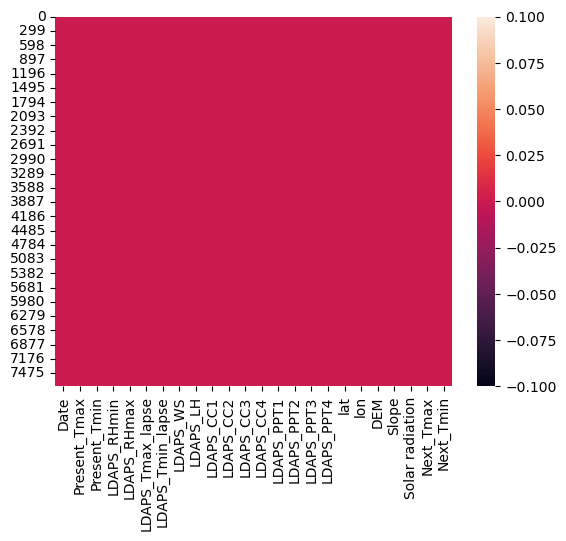

In [17]:
sns.heatmap(df.isnull())

By observing heatmap there is no null values into the dataset

In [18]:
# checking the number of unique values in each columns

df.nunique().to_frame('No of Unique values')

No of Unique values
Date                              310
Present_Tmax                      168
Present_Tmin                      156
LDAPS_RHmin                      7673
LDAPS_RHmax                      7665
LDAPS_Tmax_lapse                 7676
LDAPS_Tmin_lapse                 7676
LDAPS_WS                         7676
LDAPS_LH                         7676
LDAPS_CC1                        7570
LDAPS_CC2                        7583
LDAPS_CC3                        7600
LDAPS_CC4                        7525
LDAPS_PPT1                       2813
LDAPS_PPT2                       2511
LDAPS_PPT3                       2357
LDAPS_PPT4                       1919
lat                                12
lon                                25
DEM                                25
Slope                              27
Solar radiation                  1575
Next_Tmax                         184
Next_Tmin                         158

In [19]:
df.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7752.000000   7752.000000  7752.000000  7752.000000       7752.000000   
mean      29.768211     23.225059    56.759372    88.374804         29.613447   
std        2.956557      2.403036    14.596973     7.157124          2.932898   
min       20.000000     11.300000    19.794666    58.936283         17.624954   
25%       27.800000     21.700000    46.046162    84.316923         27.693091   
50%       29.900000     23.400000    55.313244    89.699505         29.662273   
75%       32.000000     24.900000    67.038254    93.704500         31.683819   
max       37.600000     29.900000    98.524734   100.000153         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean          23.512589     7.097875    62.505019     0.368774     0.356080   
std            2.333973     2.173245    33.567001     0.261185     0.256810   
min           14.272646     2.882580   -13.603212     0.000000     0.000000   
25%           22.114651     5.686487    37.532764     0.148321     0.142328   
50%           23.735942     6.563068    57.310630     0.320110     0.315667   
75%           25.134000     8.007471    83.904586     0.571696     0.554963   
max           29.619342    21.857621   213.414006     0.967277     0.968353   

       ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  ...  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean   ...     0.485003     0.278200     0.269407    37.544722   126.991397   
std    ...     1.754258     1.156174     1.200364     0.050352     0.079435   
min    ...     0.000000     0.000000     0.000000    37.456200   126.826000   
25%    ...     0.000000     0.000000     0.000000    37.510200   126.937000   
50%    ...     0.000000     0.000000     0.000000    37.550700   126.995000   
75%    ...     0.024276     0.009697     0.000693    37.577600   127.042000   
max    ...    21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7752.000000  7752.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.122557     2.483276  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.400000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000  

[8 rows x 23 columns]

By observing describe method below is the observations

the count of all columns is same means there is no null values into the dataset

the median value is greater than mean in columns Present Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Solar radiation,Next_Tmin means data is skewed to left

and we have also observed the min,std,75% and max of the data

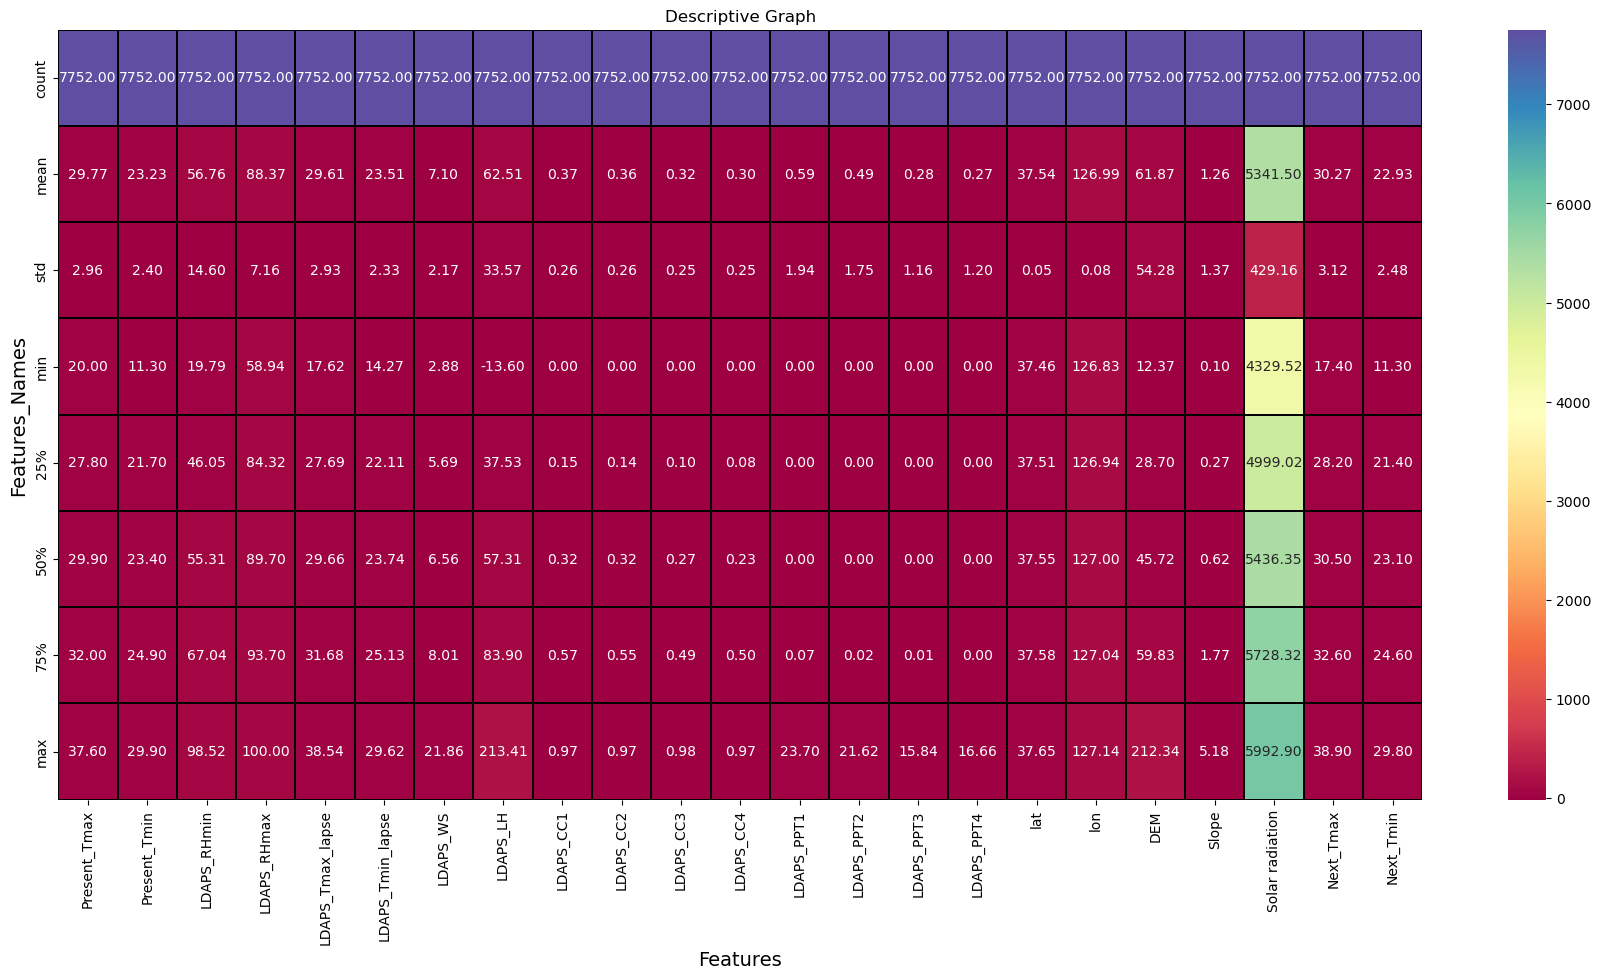

In [20]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, cmap='Spectral', linecolor='black',linewidth=0.2, fmt='0.2f')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features_Names', fontsize=14)
plt.title('Descriptive Graph')
plt.show()

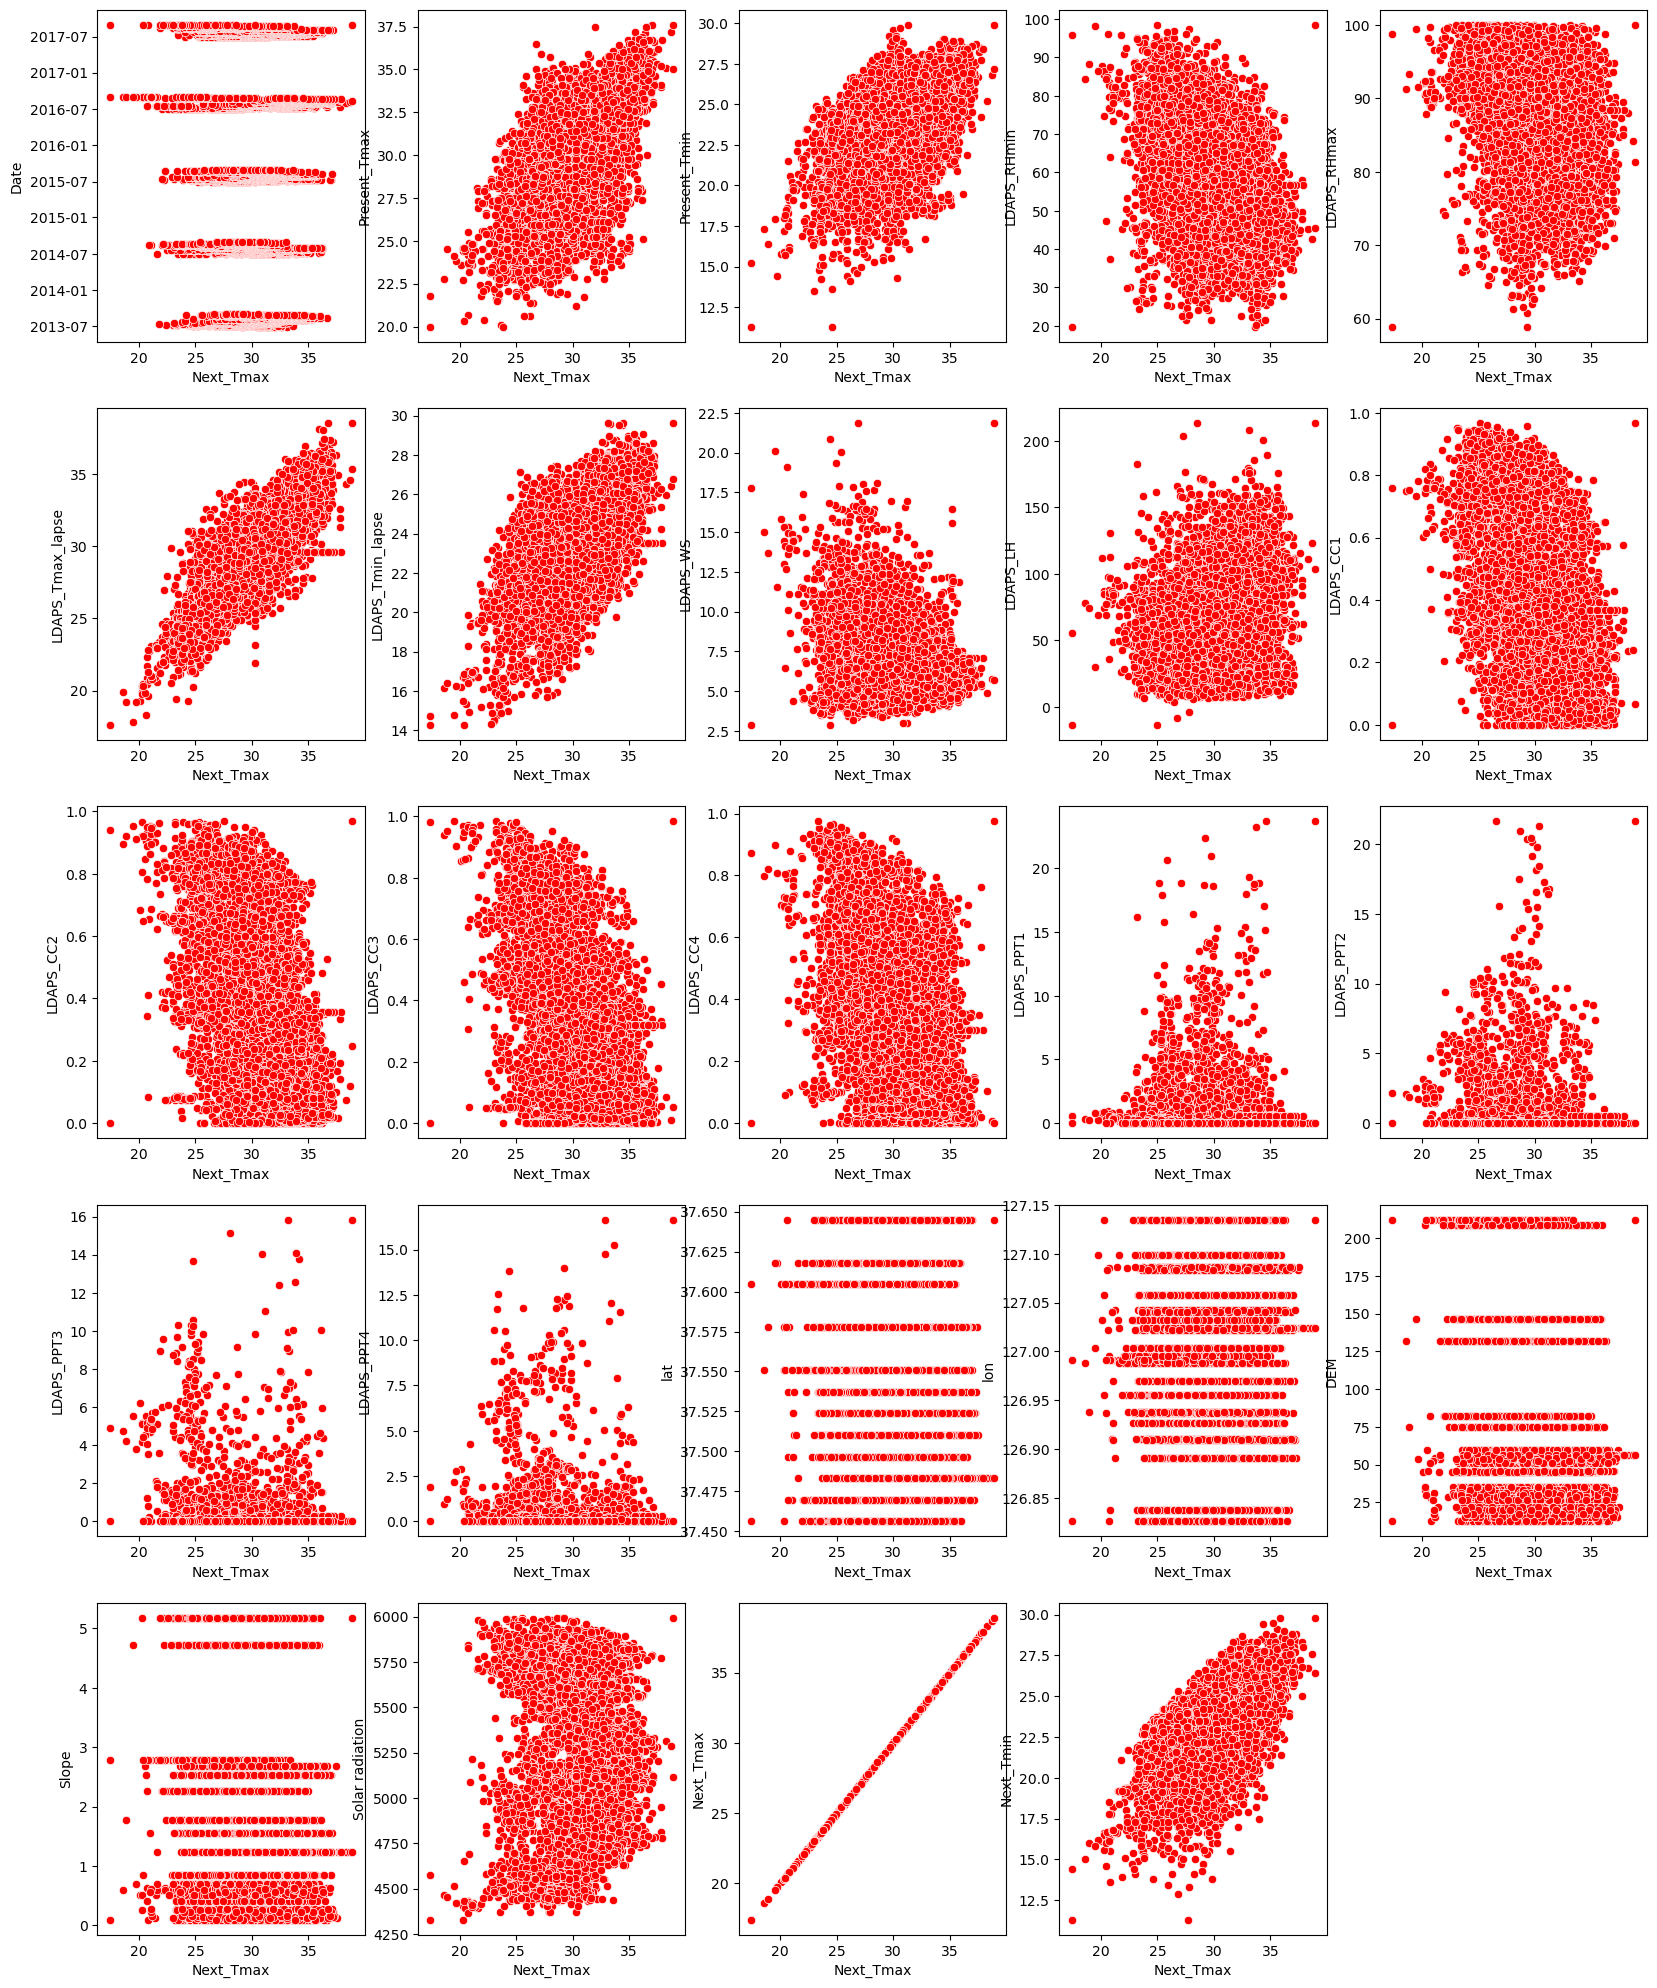

In [21]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=25:
        plt.subplot(5,5,p)
        sns.scatterplot(x='Next_Tmax',y=i,data=df,color='r')
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
        p+=1
plt.show() 

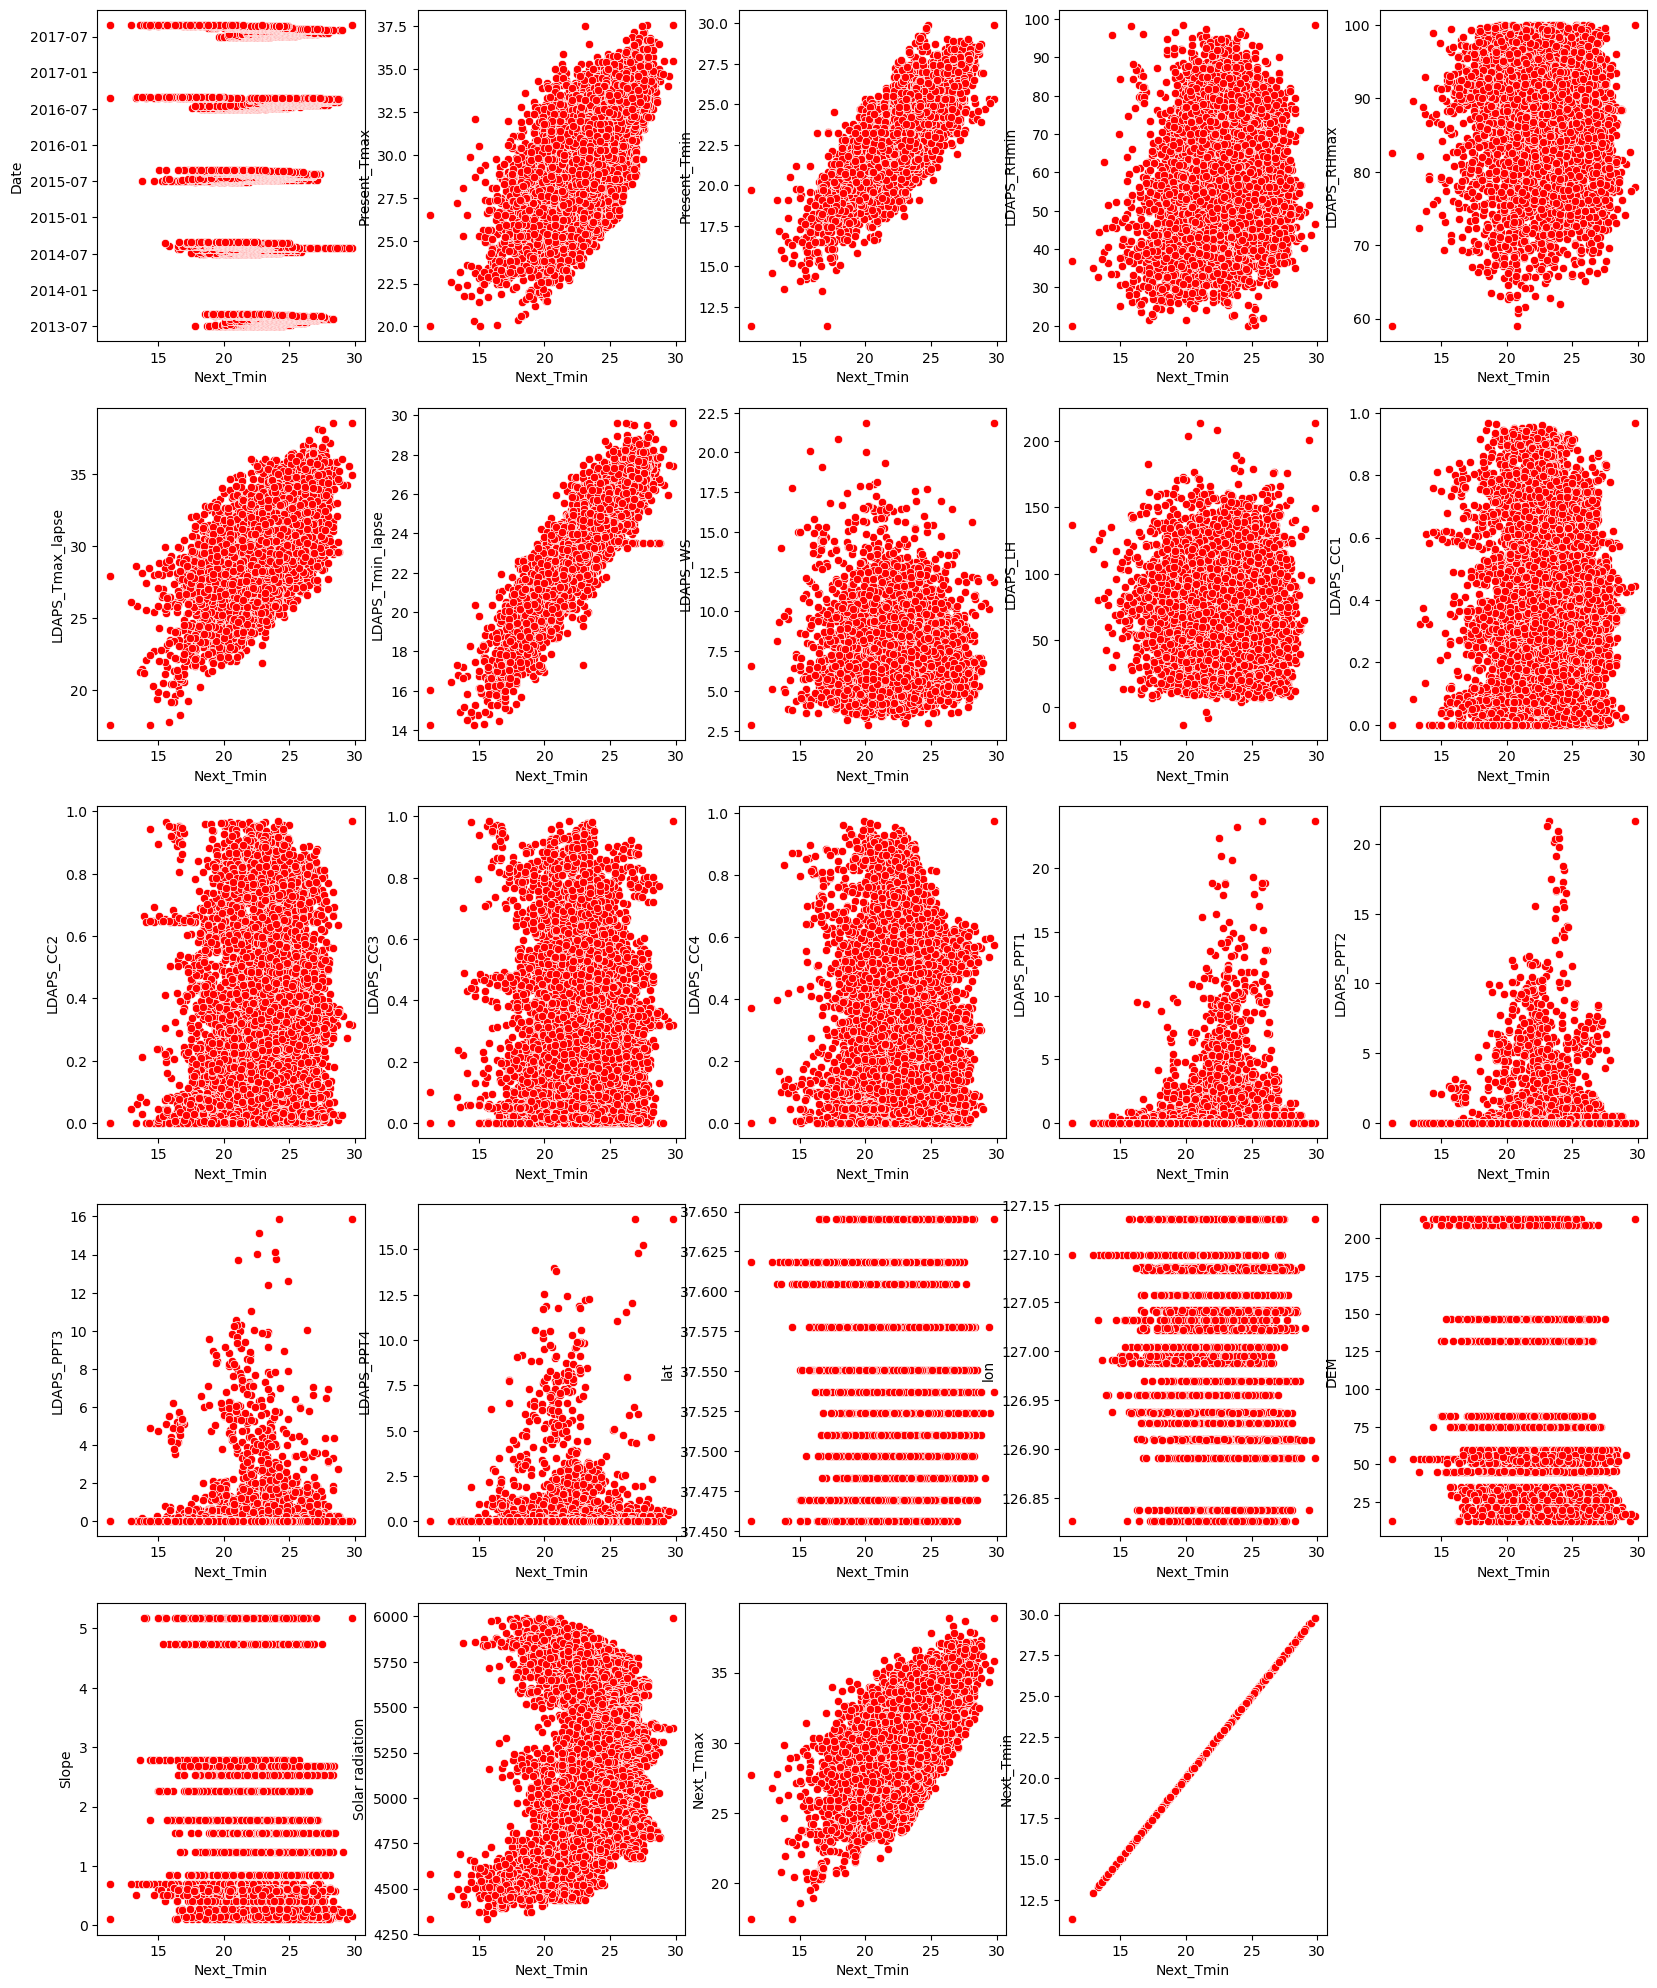

In [22]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=25:
        plt.subplot(5,5,p)
        sns.scatterplot(x='Next_Tmin',y=i,data=df,color='r')
        plt.xlabel('Next_Tmin')
        plt.ylabel(i)
        p+=1
plt.show()

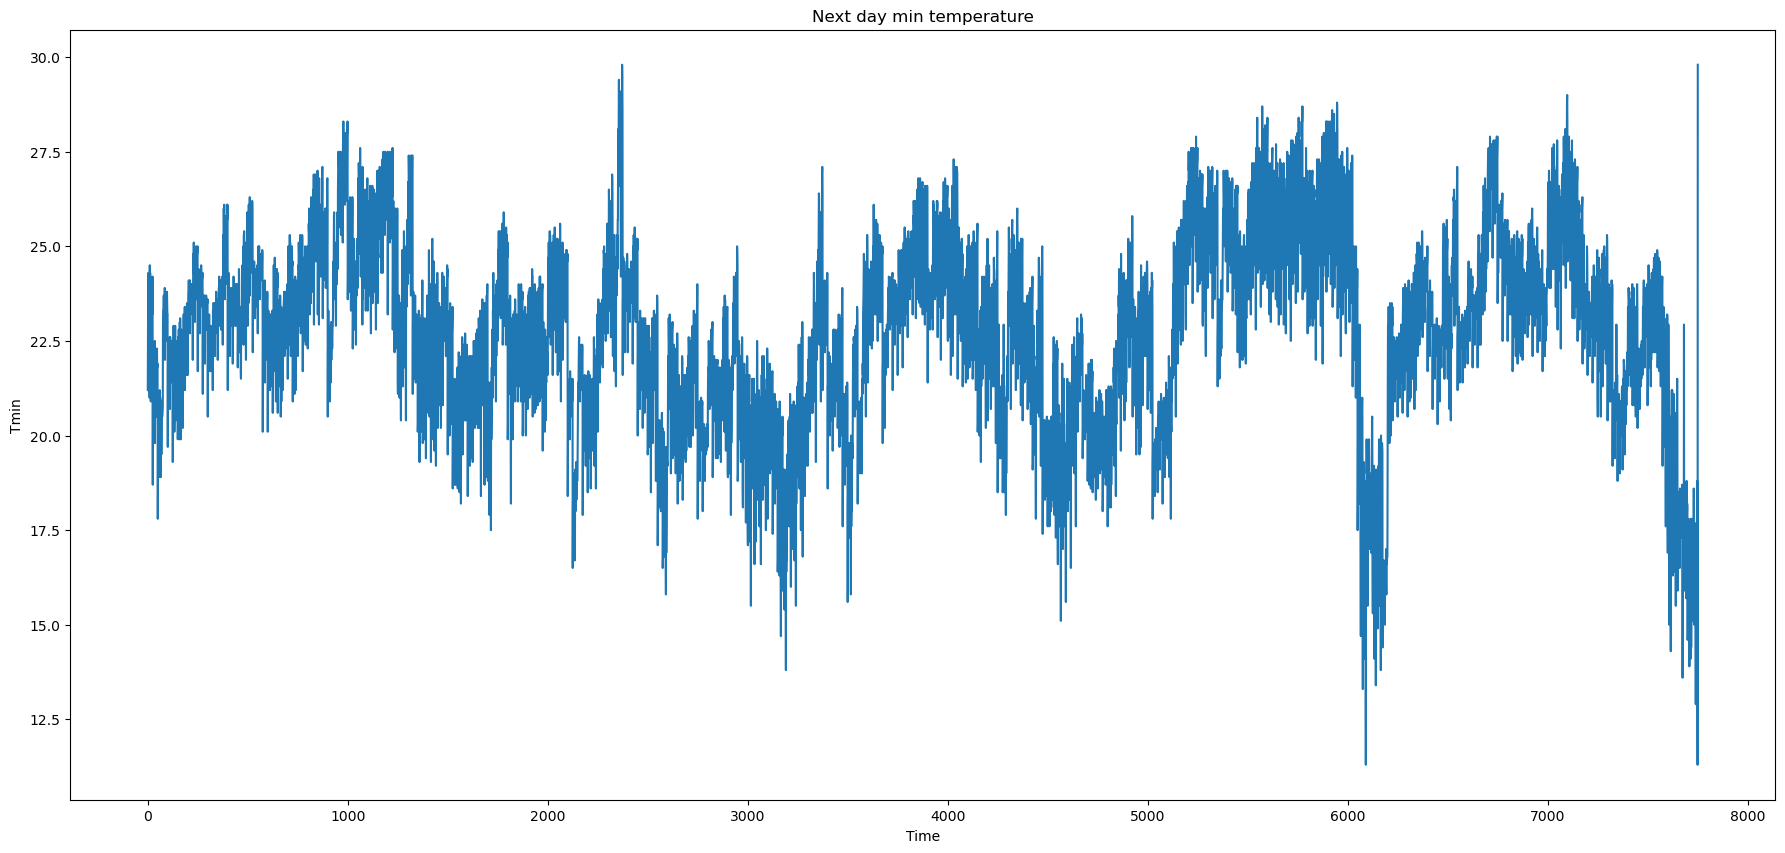

In [23]:
# for one column use plot

plt.figure(figsize=(22,10))
plt.plot(df['Next_Tmin'])
plt.xlabel('Time')
plt.ylabel('Tmin')
plt.title('Next day min temperature')
plt.show()

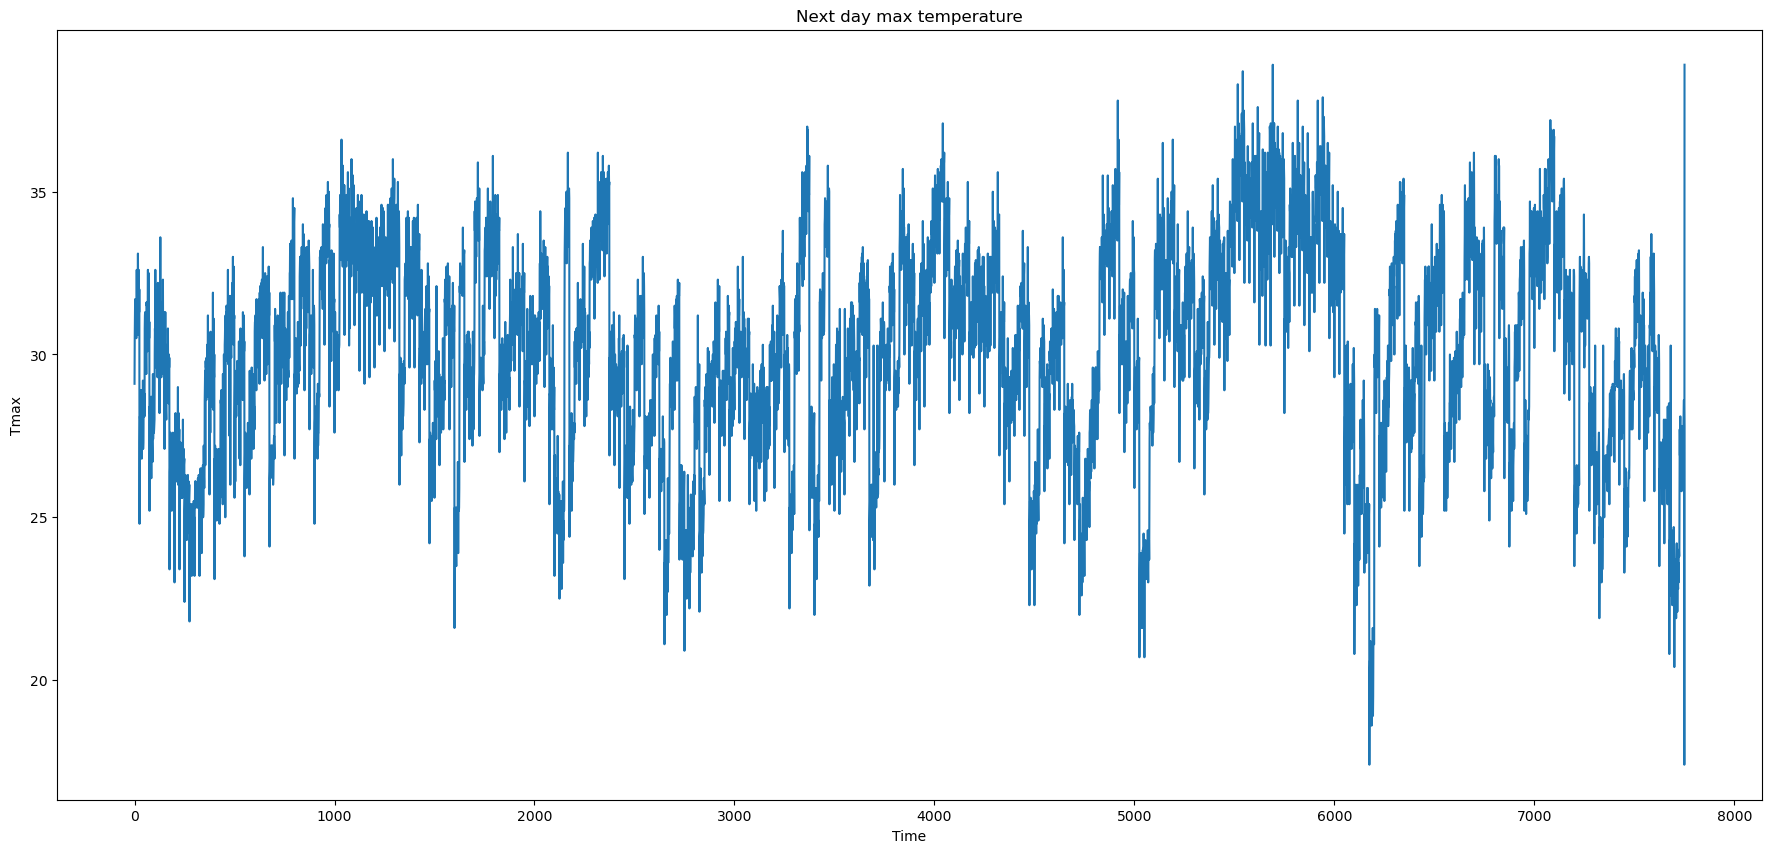

In [24]:
# for one column use plot

plt.figure(figsize=(22,10))
plt.plot(df['Next_Tmax'])
plt.xlabel('Time')
plt.ylabel('Tmax')
plt.title('Next day max temperature')
plt.show()

In [25]:
#dropping date column as it is not contributing anything towards the target variable

df.drop('Date',axis=1,inplace=True)
df

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   
7750          20.0          11.3    19.794666    58.936283         17.624954   
7751          37.6          29.9    98.524734   100.000153         38.542255   

      LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936   6.818887   69.451805   0.233947   0.203896  ...   
1            24.035009   5.691890   51.937448   0.225508   0.251771  ...   
2            24.565633   6.138224   20.573050   0.209344   0.257469  ...   
3            23.326177   5.650050   65.727144   0.216372   0.226002  ...   
4            23.486480   5.735004  107.965535   0.151407   0.249995  ...   
...                ...        ...         ...        ...        ...  ...   
7747         18.775678   6.148918   72.058294   0.030034   0.081035  ...   
7748         18.733519   6.542819   47.241457   0.035874   0.074962  ...   
7749         18.522965   7.289264    9.090034   0.048954   0.059869  ...   
7750         14.272646   2.882580  -13.603212   0.000000   0.000000  ...   
7751         29.619342  21.857621  213.414006   0.967277   0.968353  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0       0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1       0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2       0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3       0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4       0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...          ...         ...         ...      ...      ...       ...   
7747    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 23 columns]

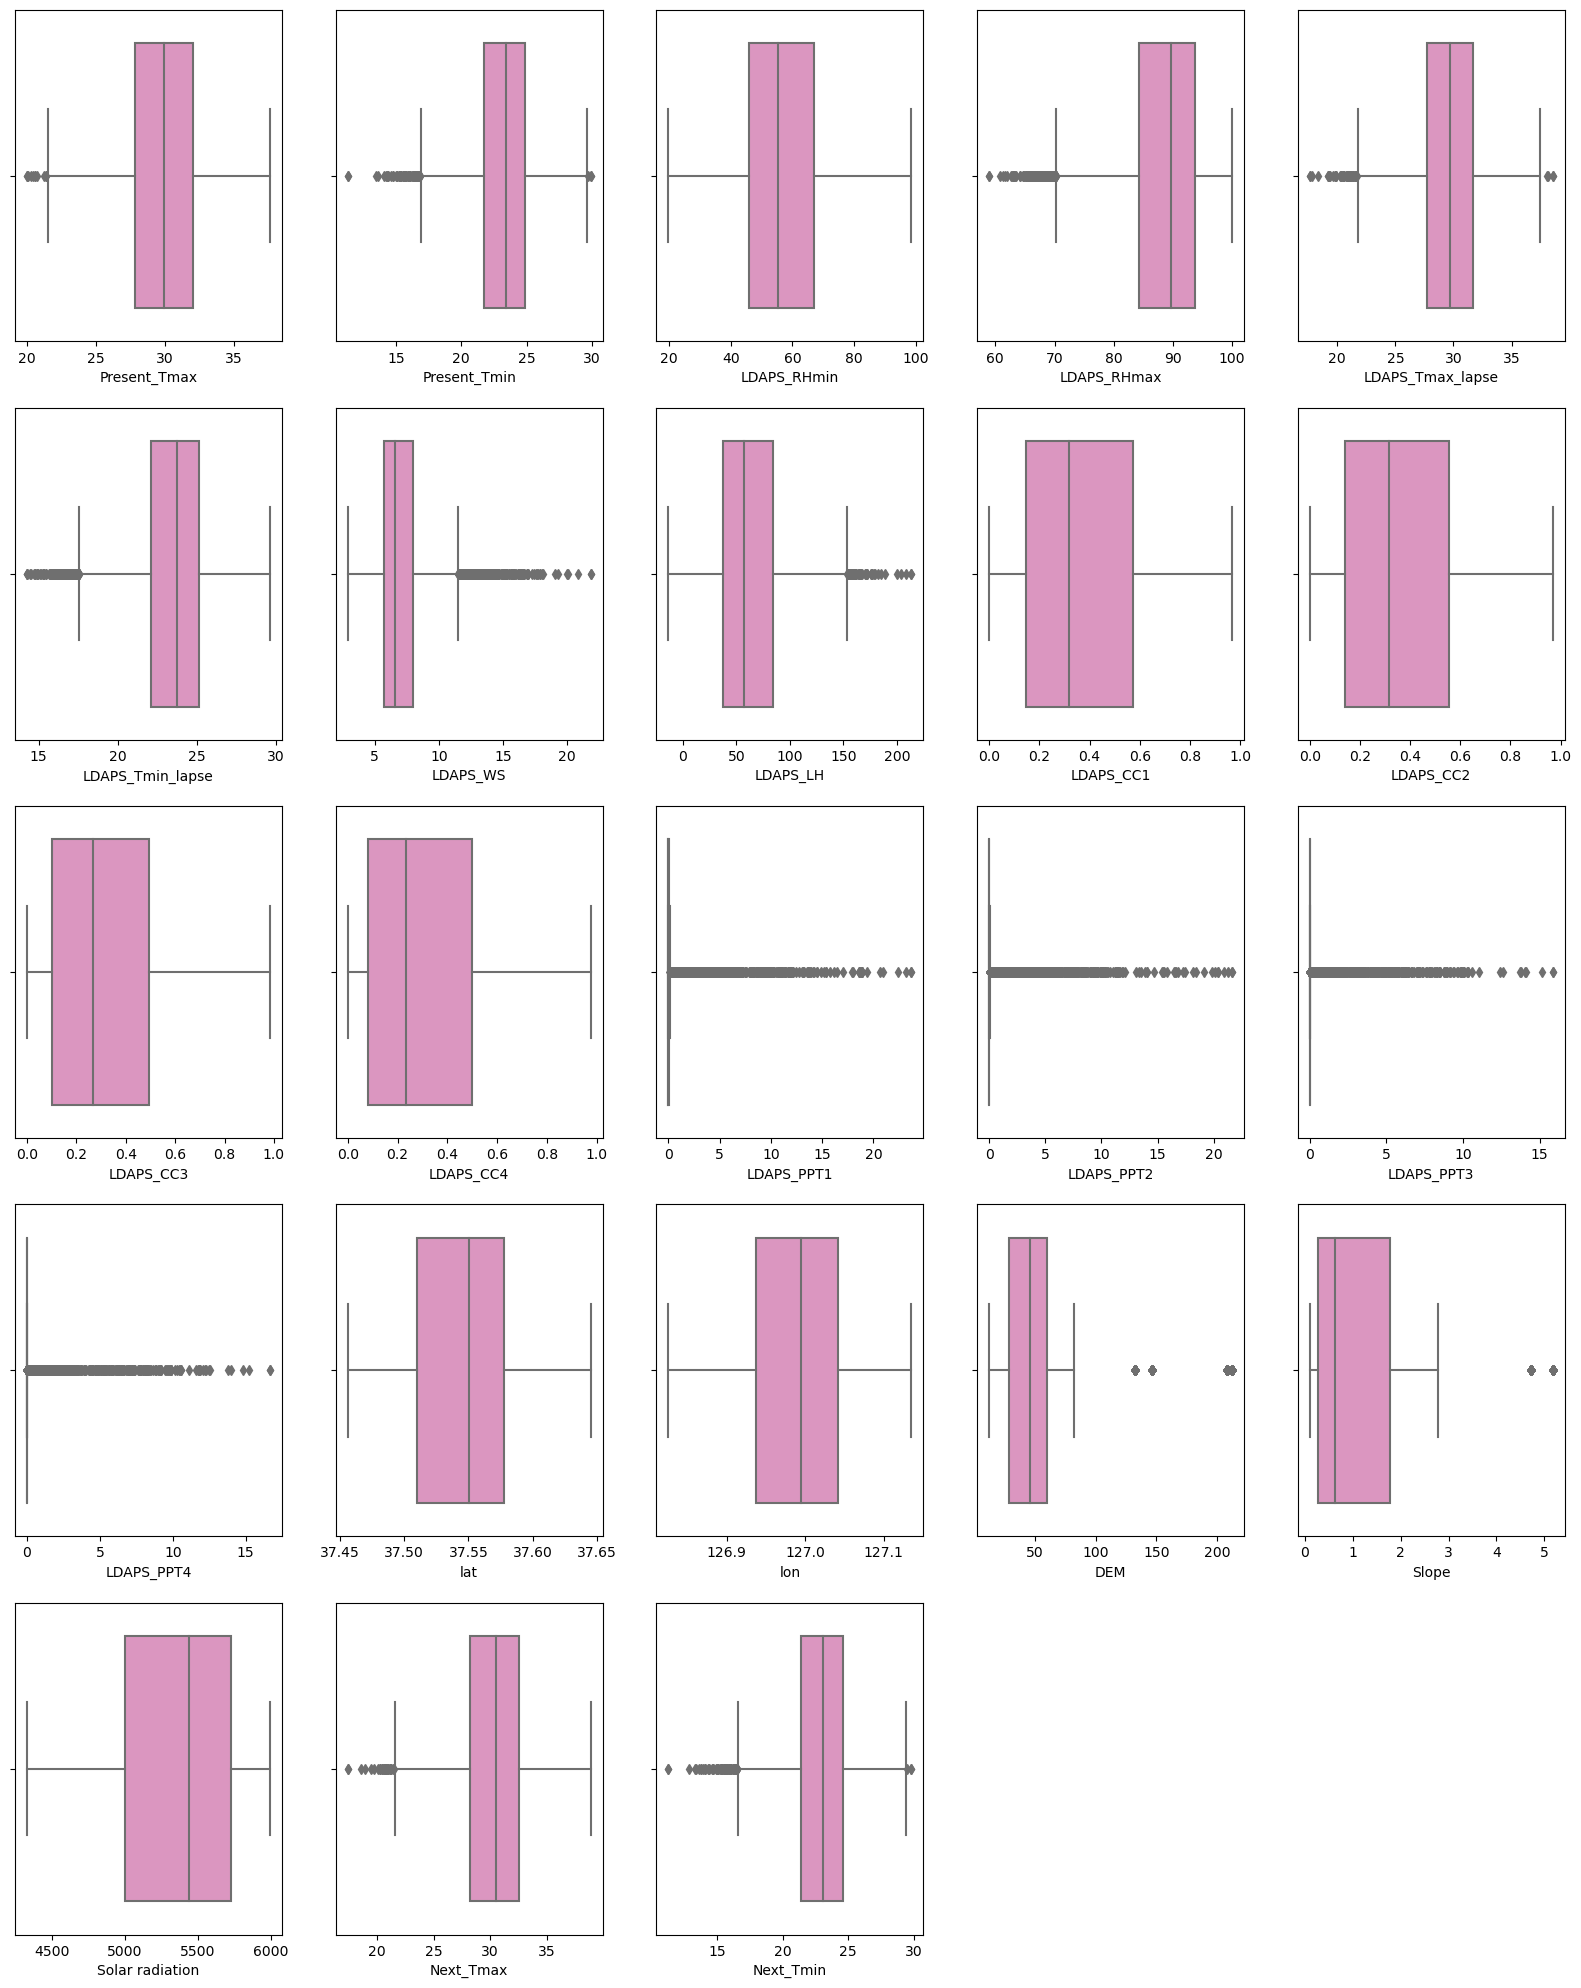

In [26]:
# lets check the outliers using box plot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i],palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

Here we have outliers in columns slope,DEM,LDAPS_PPT4,LDAPS_PPT3,LDAPS_PPT2,LDAPS_PPT1,LDAPS_LH,LDAPS_WS,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse
LDAPS_RHmax,LDAPS_RHmin,Present_Tmin,Present_Tmax

In [27]:
from scipy.stats import zscore
out_features=df[['Slope','DEM','LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1','LDAPS_LH','LDAPS_WS','LDAPS_Tmin_lapse','LDAPS_Tmax_lapse','LDAPS_RHmax','LDAPS_RHmin','Present_Tmin','Present_Tmax']]
z=np.abs(zscore(out_features))
z

Slope       DEM  LDAPS_PPT4  LDAPS_PPT3  LDAPS_PPT2  LDAPS_PPT1  \
0     1.115004  2.772243    0.224453    0.240636    0.276489    0.305750   
1     0.542158  0.315157    0.224453    0.240636    0.276489    0.305750   
2     0.723133  0.526218    0.224453    0.240636    0.276489    0.305750   
3     0.932424  0.297588    0.224453    0.240636    0.276489    0.305750   
4     0.548433  0.494322    0.224453    0.240636    0.276489    0.305750   
...        ...       ...         ...         ...         ...         ...   
7747  0.803915  0.852681    0.224453    0.240636    0.276489    0.305750   
7748  0.755095  0.821213    0.224453    0.240636    0.276489    0.305750   
7749  0.719338  0.779043    0.224453    0.240636    0.276489    0.305750   
7750  0.845455  0.911963    0.224453    0.240636    0.276489    0.305750   
7751  2.861435  2.772243   13.651790   13.461674   12.049552   11.935477   

      LDAPS_LH  LDAPS_WS  LDAPS_Tmin_lapse  LDAPS_Tmax_lapse  LDAPS_RHmax  \
0     0.206966  0.128382          0.216663          0.524889     0.383078   
1     0.314841  0.646994          0.223848          0.080895     0.311586   
2     1.249283  0.441604          0.451210          0.162936     0.614982   
3     0.095997  0.666247          0.079874          0.031092     1.133054   
4     1.354409  0.627154          0.011187          0.170325     0.248765   
...        ...       ...               ...               ...          ...   
7747  0.284622  0.436683          2.029679          1.112066     1.328126   
7748  0.454749  0.255421          2.047744          0.887662     1.548184   
7749  1.591397  0.088072          2.137962          0.570780     1.555342   
7750  2.267499  1.939757          3.959146          4.087857     4.113443   
7751  4.496044  6.792009          2.616632          3.044561     1.624409   

      LDAPS_RHmin  Present_Tmin  Present_Tmax  
0        0.102515      0.759529      0.361326  
1        0.308027      0.676296      0.721084  
2        0.552814      0.031188      0.619608  
3        0.101426      0.072805      0.754909  
4        0.040098      0.551446      0.551957  
...           ...           ...           ...  
7747     2.056591      2.549048      2.187892  
7748     2.241619      2.299348      2.187892  
7749     2.317504      2.424198      2.221718  
7750     2.532517      4.962817      3.304127  
7751     2.861419      2.777891      2.649126  

[7752 rows x 14 columns]

In [28]:
# threshold = 3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([4, 7, 4, ..., 6, 7, 9], dtype=int64))

In [29]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(6907, 23)

In [30]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (7752, 23)
New Dataframe (6907, 23)


In [31]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 10.900412796697626


Here we have treated all the outliers

In [32]:
df=df1

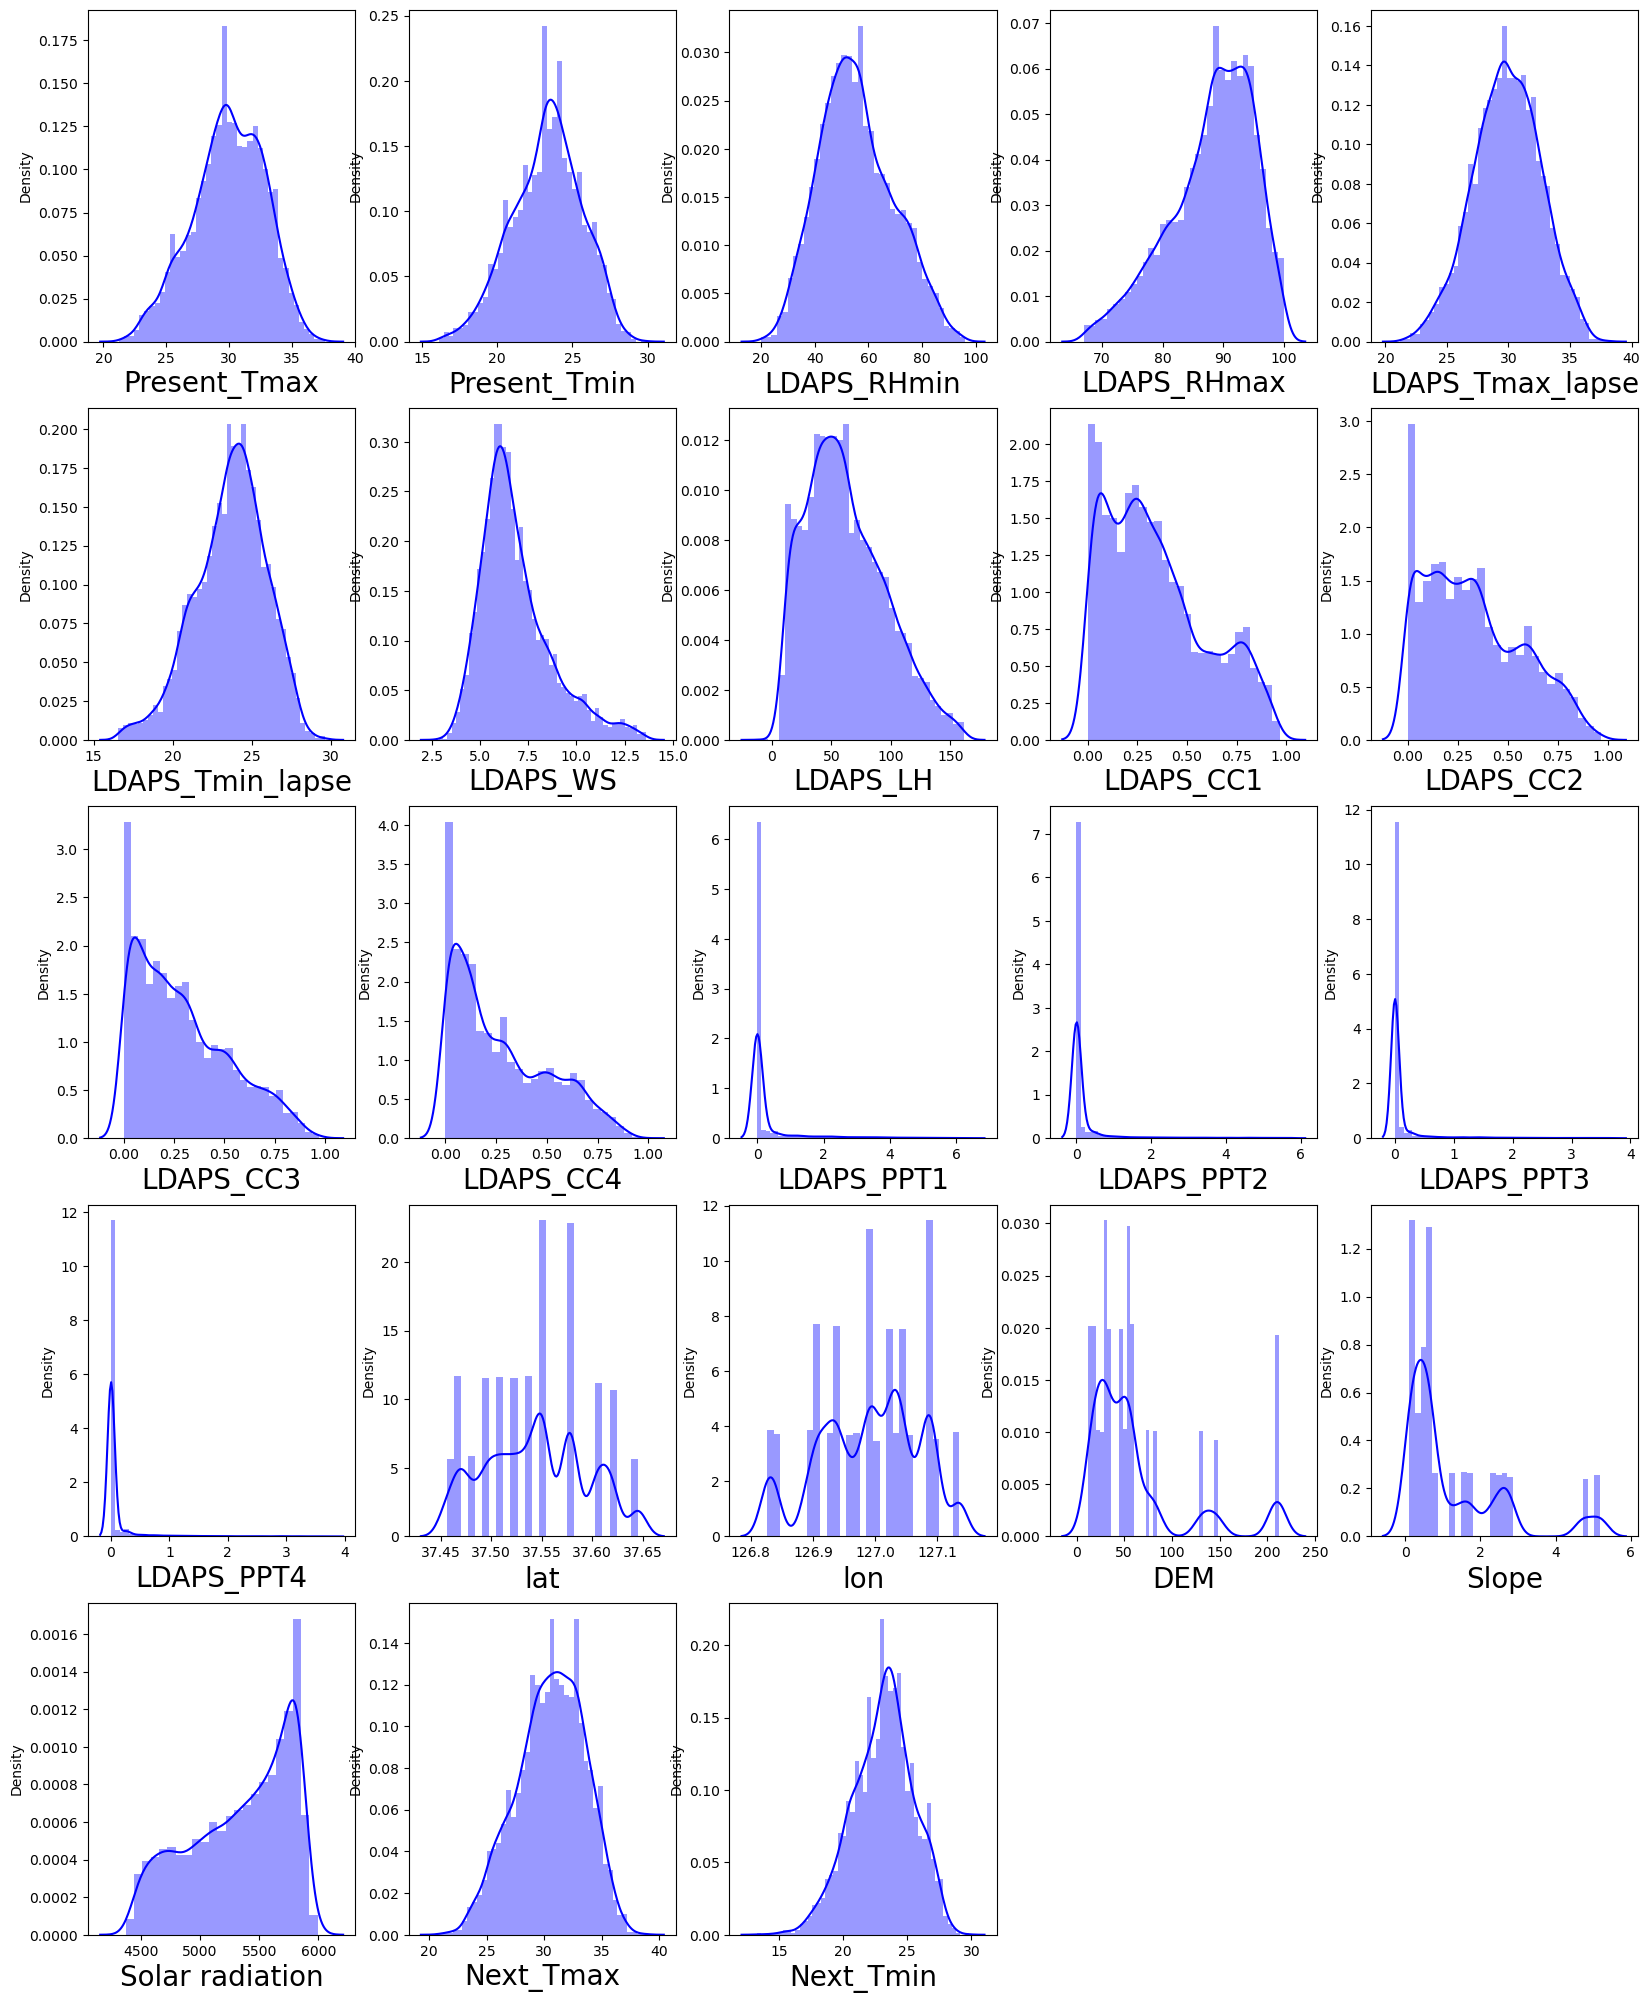

In [33]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

Here we have skewness in all LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4

In [34]:
df.skew()

Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.685714
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.396956
LDAPS_WS            1.085850
LDAPS_LH            0.565799
LDAPS_CC1           0.593987
LDAPS_CC2           0.501474
LDAPS_CC3           0.701971
LDAPS_CC4           0.711892
LDAPS_PPT1          3.735186
LDAPS_PPT2          4.848692
LDAPS_PPT3          5.484463
LDAPS_PPT4          5.932870
lat                 0.106291
lon                -0.276193
DEM                 1.761452
Slope               1.592353
Solar radiation    -0.503706
Next_Tmax          -0.270276
Next_Tmin          -0.293914
dtype: float64

In [35]:
# removing skewness using cube root

df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])
df['DEM']=np.cbrt(df['DEM'])
df['Slope']=np.cbrt(df['Slope'])

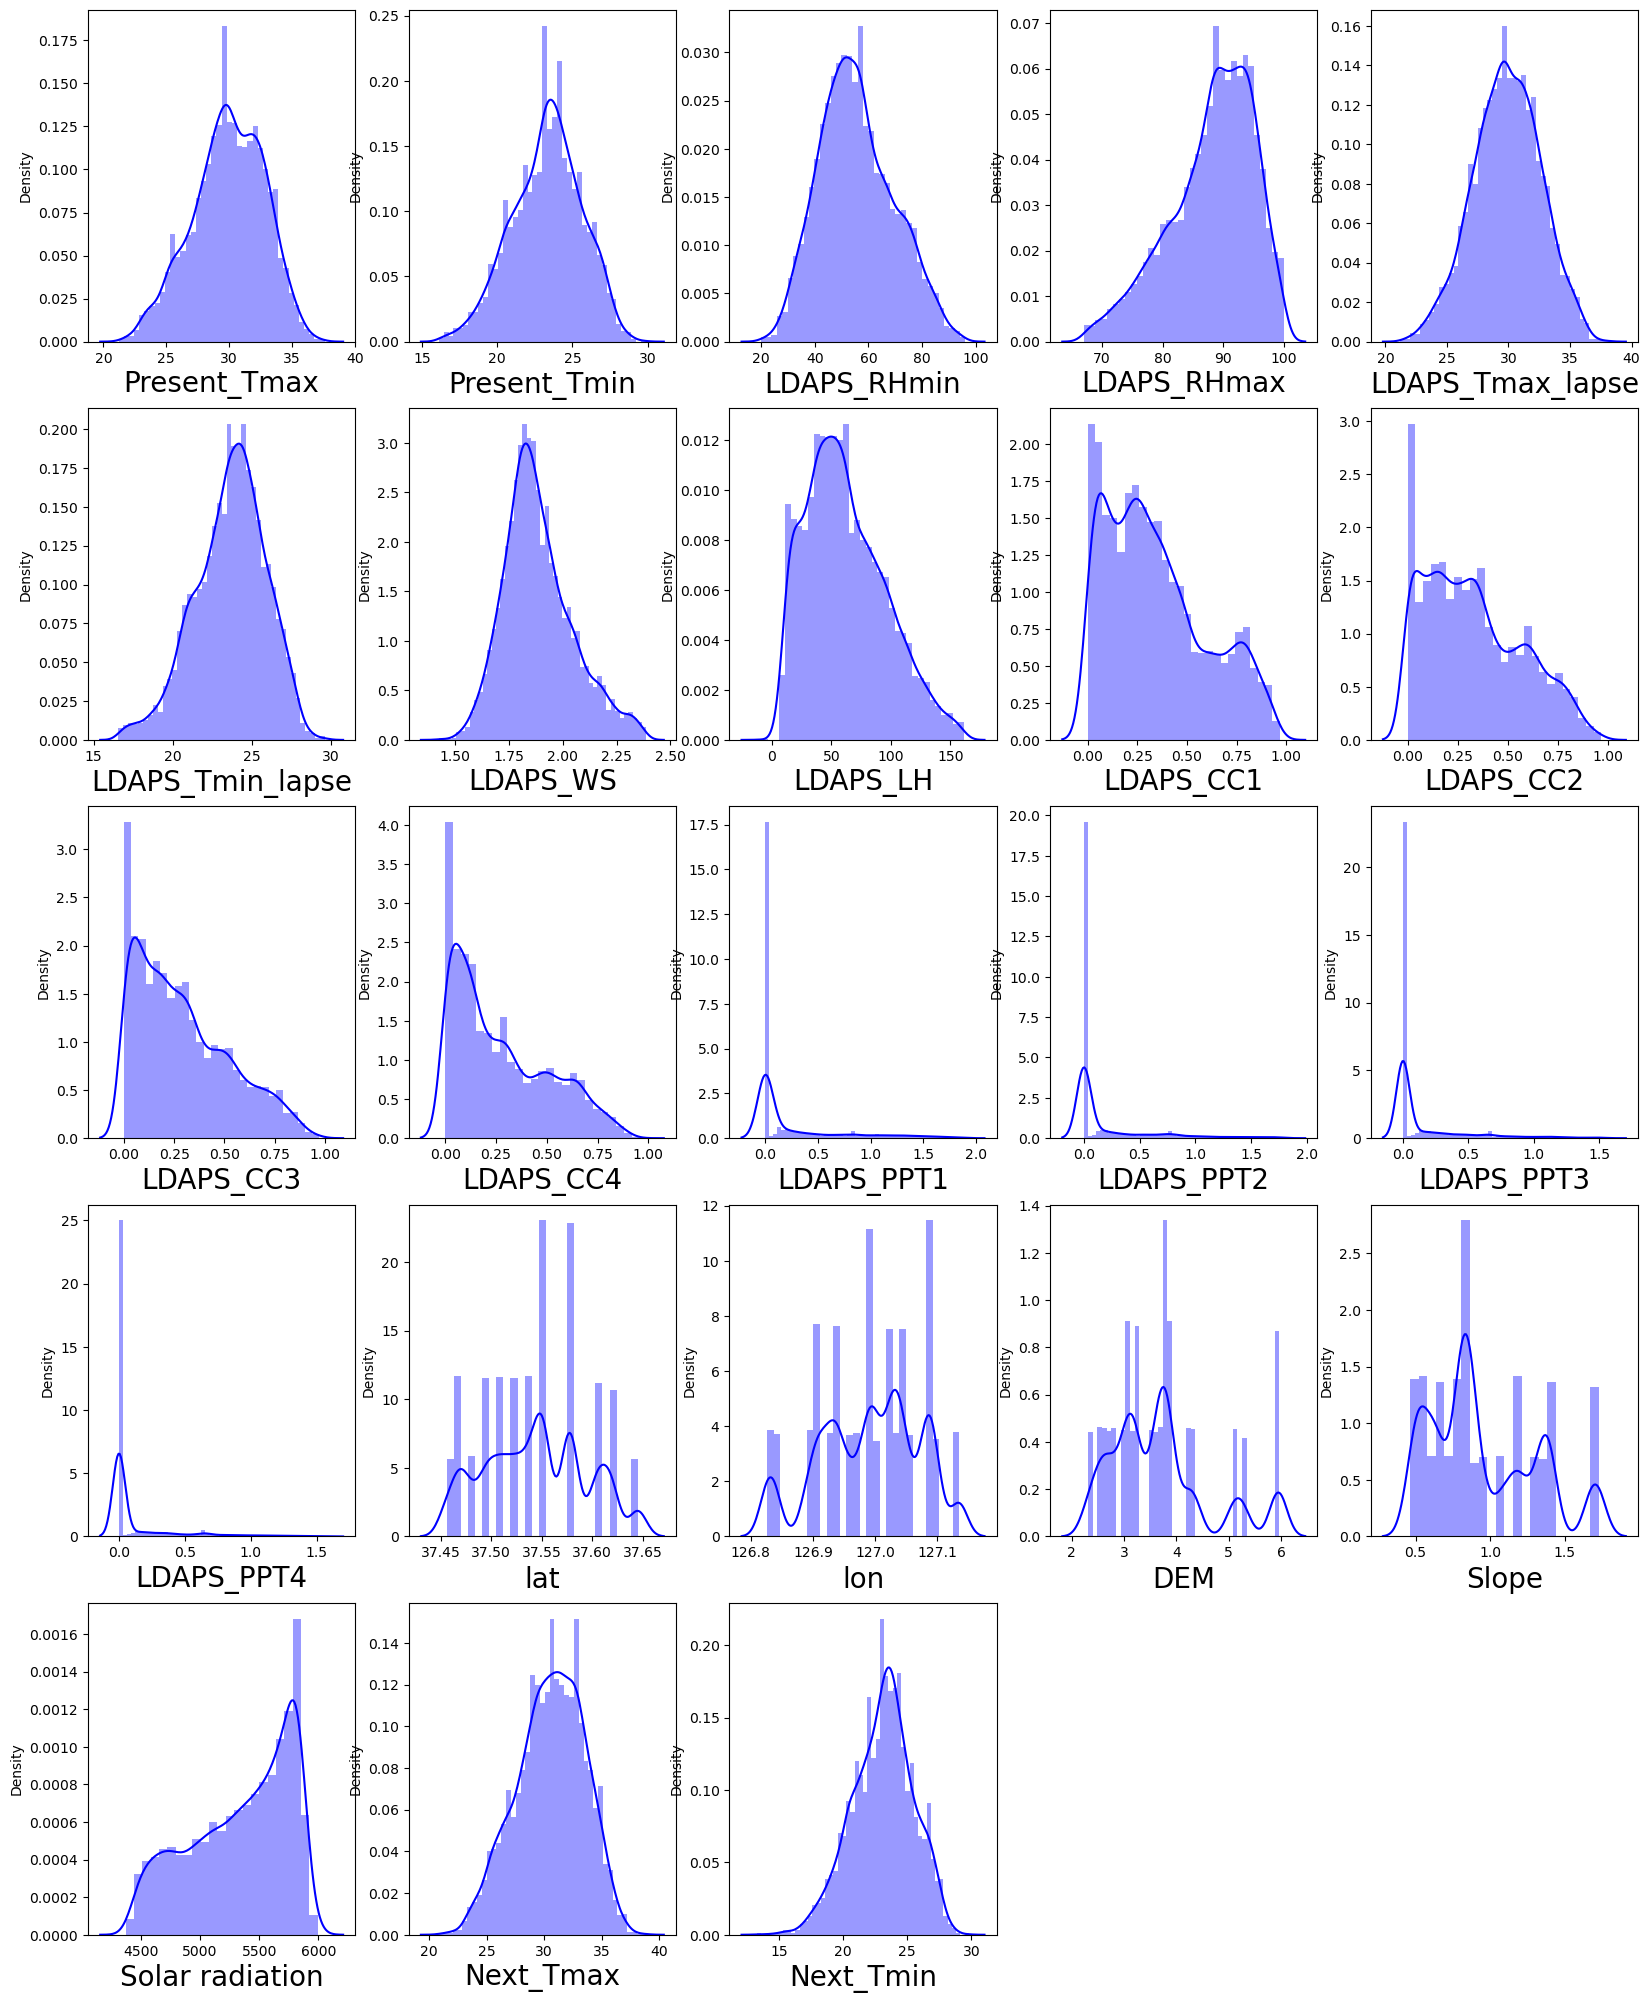

In [36]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

Now the data distribution looks good

In [37]:
cor=df.corr()
cor

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.614395    -0.149083    -0.291141   
Present_Tmin          0.614395      1.000000     0.153622    -0.034357   
LDAPS_RHmin          -0.149083      0.153622     1.000000     0.553500   
LDAPS_RHmax          -0.291141     -0.034357     0.553500     1.000000   
LDAPS_Tmax_lapse      0.535406      0.436104    -0.552112    -0.384065   
LDAPS_Tmin_lapse      0.610636      0.755003     0.135762    -0.134360   
LDAPS_WS             -0.093366      0.024623     0.215263     0.077220   
LDAPS_LH              0.127053     -0.007450    -0.039676     0.269492   
LDAPS_CC1            -0.284372      0.092169     0.576662     0.412432   
LDAPS_CC2            -0.152768      0.120491     0.715239     0.363679   
LDAPS_CC3            -0.058346      0.044265     0.657090     0.171865   
LDAPS_CC4            -0.048981     -0.004448     0.459289     0.054244   
LDAPS_PPT1           -0.170080      0.099147     0.405510     0.395299   
LDAPS_PPT2           -0.066631      0.125809     0.511903     0.339961   
LDAPS_PPT3           -0.016101      0.060067     0.402158     0.207576   
LDAPS_PPT4           -0.021292     -0.040479     0.250419     0.121799   
lat                  -0.049950     -0.071011     0.088452     0.198764   
lon                   0.010636     -0.044785    -0.095040     0.016591   
DEM                  -0.155100     -0.247972     0.080327     0.172506   
Slope                -0.096138     -0.157906     0.094885     0.199430   
Solar radiation      -0.061748      0.015594     0.252285     0.155655   
Next_Tmax             0.587102      0.448868    -0.424992    -0.297779   
Next_Tmin             0.615886      0.786074     0.139054    -0.089035   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.535406          0.610636 -0.093366  0.127053   
Present_Tmin              0.436104          0.755003  0.024623 -0.007450   
LDAPS_RHmin              -0.552112          0.135762  0.215263 -0.039676   
LDAPS_RHmax              -0.384065         -0.134360  0.077220  0.269492   
LDAPS_Tmax_lapse          1.000000          0.620604 -0.204499  0.035373   
LDAPS_Tmin_lapse          0.620604          1.000000 -0.038545 -0.138488   
LDAPS_WS                 -0.204499         -0.038545  1.000000 -0.051960   
LDAPS_LH                  0.035373         -0.138488 -0.051960  1.000000   
LDAPS_CC1                -0.415694          0.041006  0.242356 -0.145454   
LDAPS_CC2                -0.491679          0.105609  0.199009 -0.259101   
LDAPS_CC3                -0.501171          0.023357  0.152291 -0.241025   
LDAPS_CC4                -0.387304         -0.029408  0.150784 -0.167124   
LDAPS_PPT1               -0.282935         -0.021388  0.235706 -0.012358   
LDAPS_PPT2               -0.338372          0.033702  0.178122 -0.093354   
LDAPS_PPT3               -0.269721         -0.009985  0.143342 -0.015028   
LDAPS_PPT4               -0.217937         -0.097416  0.210265  0.019386   
lat                      -0.036970         -0.088850 -0.018742  0.123933   
lon                       0.102265         -0.030822 -0.075747  0.023446   
DEM                      -0.146278         -0.183282  0.139059  0.051031   
Slope                    -0.123548         -0.167758  0.108734  0.053115   
Solar radiation           0.015199          0.112163  0.138496 -0.038851   
Next_Tmax                 0.806117          0.540175 -0.248752  0.169936   
Next_Tmin                 0.546807          0.868429  0.000039 -0.051971   

                  LDAPS_CC1  LDAPS_CC2  ...  LDAPS_PPT2  LDAPS_PPT3  \
Present_Tmax      -0.284372  -0.152768  ...   -0.066631   -0.016101   
Present_Tmin       0.092169   0.120491  ...    0.125809    0.060067   
LDAPS_RHmin        0.576662   0.715239  ...    0.511903    0.402158   
LDAPS_RHmax        0.412432   0.363679  ...    0.339961    0.207576   
LDAPS_Tmax_lapse  -0.415694  -0.491679  ...   -0.338372   -0.

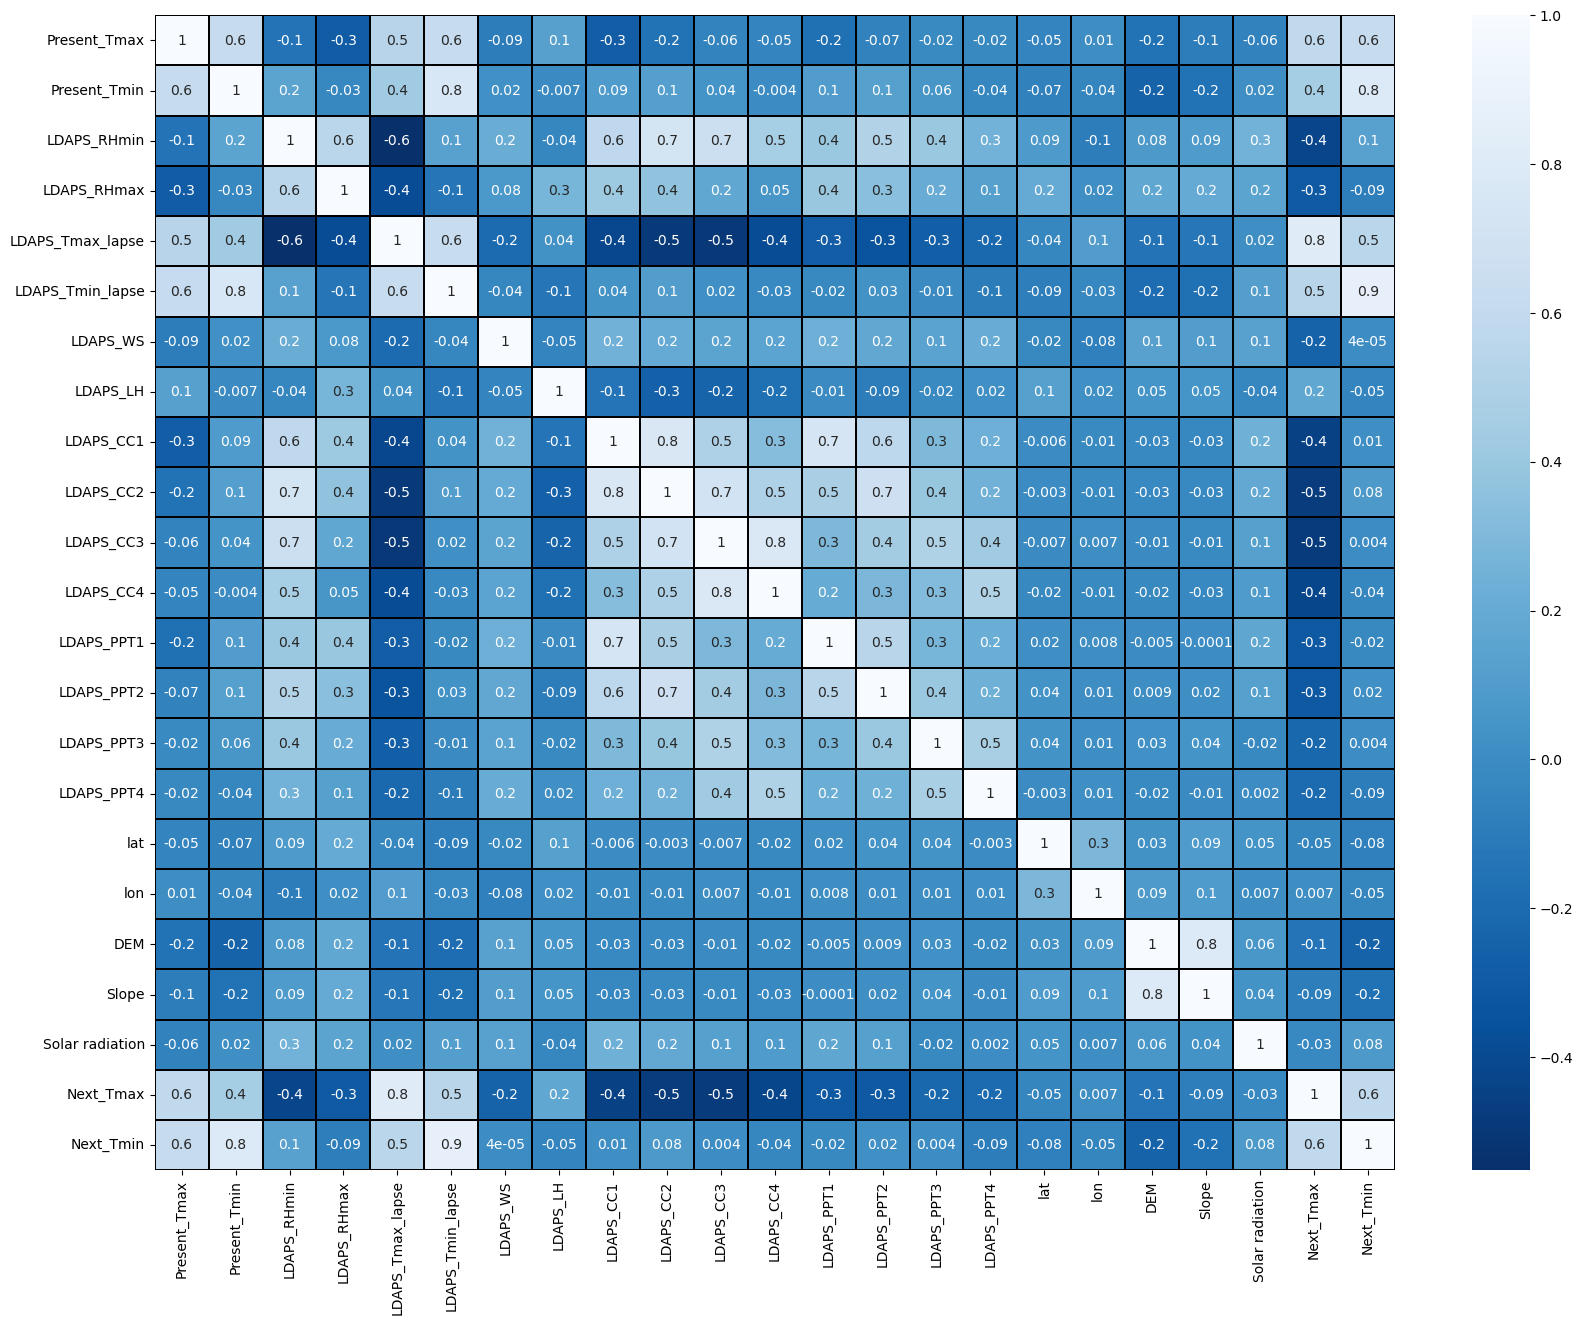

In [38]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

In [39]:
cor["Next_Tmin"].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.868429
Present_Tmin        0.786074
Present_Tmax        0.615886
Next_Tmax           0.584606
LDAPS_Tmax_lapse    0.546807
LDAPS_RHmin         0.139054
LDAPS_CC2           0.083320
Solar radiation     0.082538
LDAPS_PPT2          0.023042
LDAPS_CC1           0.013205
LDAPS_CC3           0.004452
LDAPS_PPT3          0.003833
LDAPS_WS            0.000039
LDAPS_PPT1         -0.019266
LDAPS_CC4          -0.039885
lon                -0.048080
LDAPS_LH           -0.051971
lat                -0.077640
LDAPS_RHmax        -0.089035
LDAPS_PPT4         -0.094400
Slope              -0.159143
DEM                -0.248034
Name: Next_Tmin, dtype: float64

In [40]:
cor["Next_Tmax"].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.806117
Present_Tmax        0.587102
Next_Tmin           0.584606
LDAPS_Tmin_lapse    0.540175
Present_Tmin        0.448868
LDAPS_LH            0.169936
lon                 0.006992
Solar radiation    -0.027880
lat                -0.048134
Slope              -0.089144
DEM                -0.141217
LDAPS_PPT4         -0.195517
LDAPS_PPT3         -0.222511
LDAPS_WS           -0.248752
LDAPS_RHmax        -0.297779
LDAPS_PPT1         -0.303775
LDAPS_PPT2         -0.303906
LDAPS_CC4          -0.419660
LDAPS_RHmin        -0.424992
LDAPS_CC1          -0.446244
LDAPS_CC2          -0.475584
LDAPS_CC3          -0.482836
Name: Next_Tmax, dtype: float64

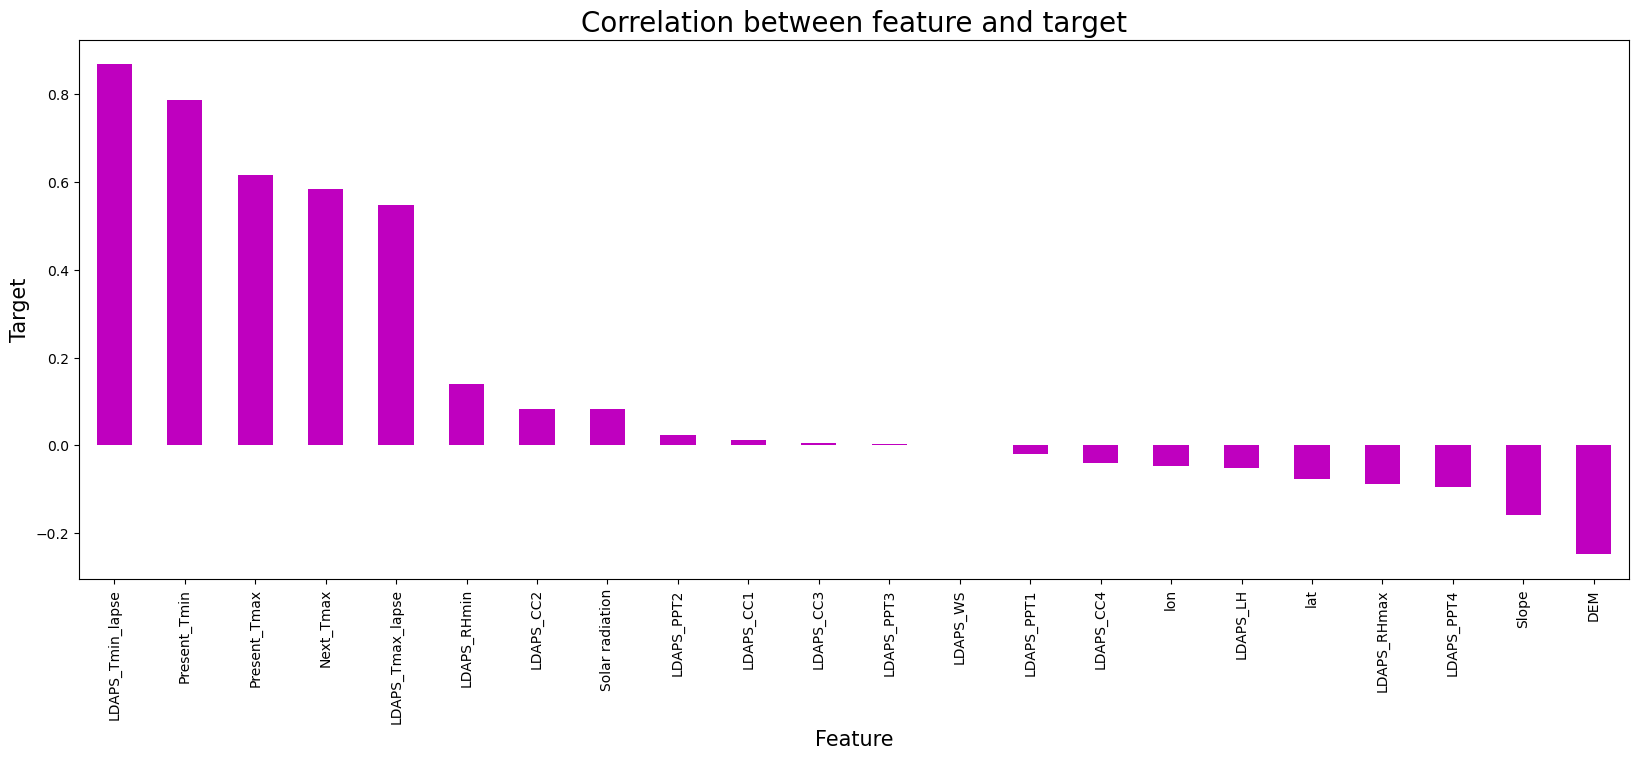

In [41]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

Here we have positive correlation with the target variable in columns LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax and negative corelation columns is Slope and DEM

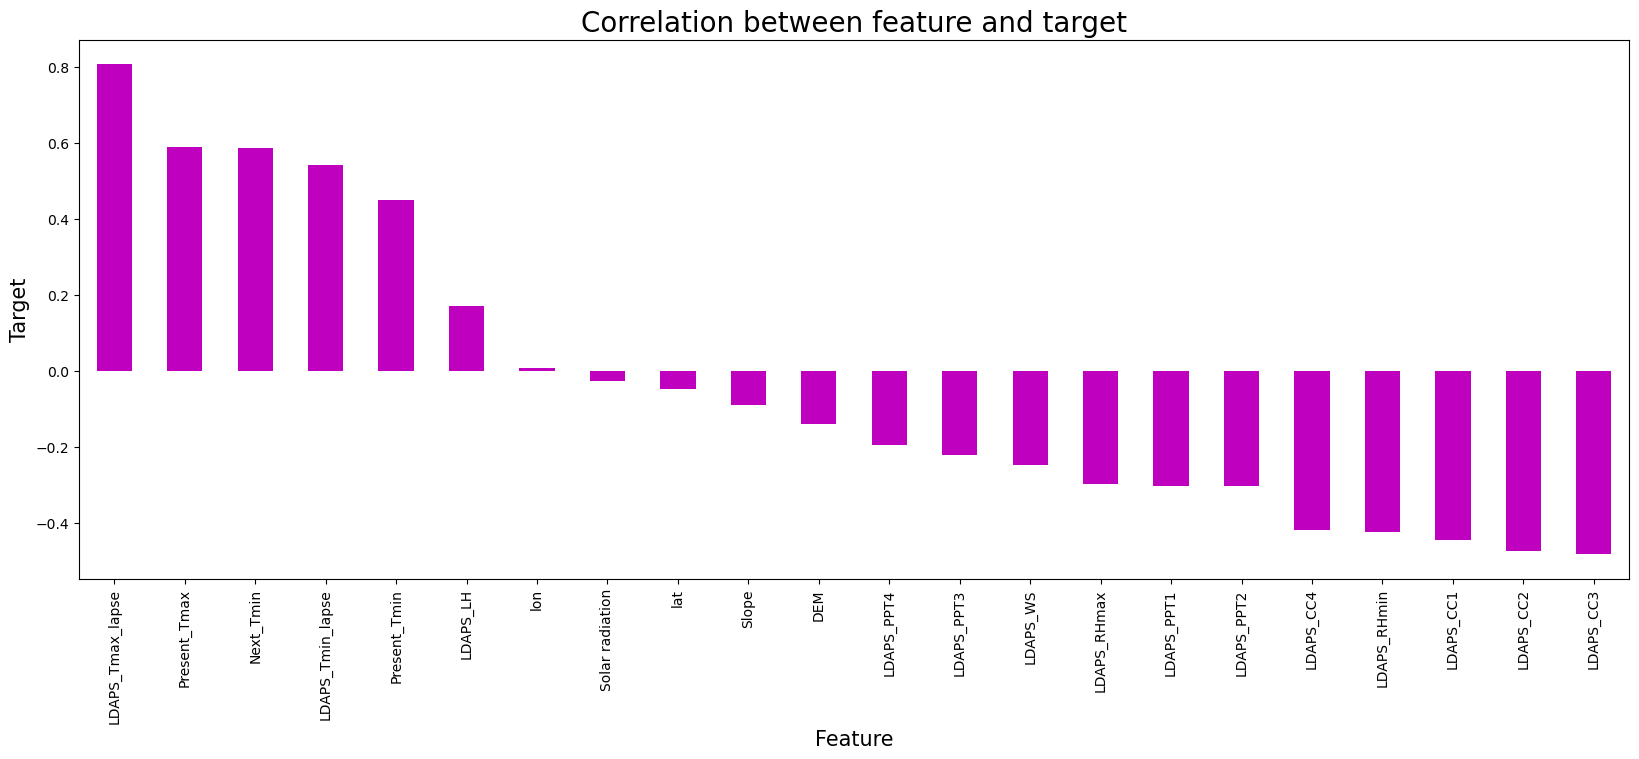

In [42]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

Here positive correlation with the atrget variable is LDAPS_Tmax_lapse,Present_Tmax,Next_Tmin,LDAPS_Tmin_lapse,Presnt_Tmin and negative correlation columns is LDAPS_PPT4,LDAPS_WS,LDAPS_PPT3,LDAPS_RHmax,LDAPS_PPT1,LDAPS_PPT2,LDAPS_CC4,LDAPS_RHmin,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3

In [46]:
# separating the indepent and target variables into x and y for the regression problem 

# First build regression model on Next_Tmin

x=df.drop('Next_Tmin', axis=1)
y=df['Next_Tmin']

In [47]:
x.shape

(6907, 22)

In [48]:
y.shape

(6907,)

In [49]:
# feature sclaing using standrd scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.430760     -0.821754     0.193211     0.437878         -0.659354   
1         0.688750     -0.735346    -0.240045     0.363875         -0.010082   
2         0.583796     -0.000870    -0.498375    -0.595244          0.077849   
3         0.723735      0.042335     0.192061     1.214202         -0.063461   
4         0.513827     -0.605732     0.042707     0.298847         -0.279337   
...            ...           ...          ...          ...               ...   
6902     -2.389904     -2.377115    -2.233737    -1.421450         -0.754887   
6903     -2.599813     -2.549933    -1.842881    -0.636259         -1.159742   
6904     -2.319935     -2.679546    -2.085350    -1.333441         -1.288685   
6905     -2.319935     -2.420320    -2.280615    -1.561230         -1.048171   
6906     -2.354920     -2.549933    -2.360699    -1.568641         -0.708540   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            -0.284272  0.059277  0.223151  -0.444076  -0.531295  ...   
1             0.177244 -0.627636 -0.303591  -0.477748  -0.331600  ...   
2             0.415448 -0.345606 -1.246873  -0.542243  -0.307833  ...   
3            -0.140960 -0.654820  0.111132  -0.514201  -0.439086  ...   
4            -0.068998 -0.599763  1.381448  -0.773408  -0.339009  ...   
...                ...       ...       ...        ...        ...  ...   
6902         -2.395926 -0.065951 -1.576463  -1.166436  -1.255930  ...   
6903         -2.615434 -0.578473  0.604949  -1.112336  -1.279498  ...   
6904         -2.183740 -0.339019  0.301541  -1.257678  -1.043761  ...   
6905         -2.202666 -0.101536 -0.444823  -1.234378  -1.069091  ...   
6906         -2.297187  0.323561 -1.592223  -1.182191  -1.132049  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.552565    -0.49886    -0.47921   -0.421974  1.212696  0.001303   
1      -0.552565    -0.49886    -0.47921   -0.421974  1.212696  0.516019   
2      -0.552565    -0.49886    -0.47921   -0.421974  0.672910  0.842425   
3      -0.552565    -0.49886    -0.47921   -0.421974  2.020375  0.390479   
4      -0.552565    -0.49886    -0.47921   -0.421974  0.135124  1.809087   
...          ...         ...         ...         ...       ...       ...   
6902   -0.552565    -0.49886    -0.47921   -0.421974  0.135124  0.616452   
6903   -0.552565    -0.49886    -0.47921   -0.421974 -0.674555  1.193938   
6904   -0.552565    -0.49886    -0.47921   -0.421974 -0.134769 -1.254102   
6905   -0.552565    -0.49886    -0.47921   -0.421974 -0.404662 -1.028129   
6906   -0.552565    -0.49886    -0.47921   -0.421974 -0.404662 -0.262332   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.362315  1.292359         1.551286  -0.496440  
1    -0.137558 -0.415548         1.257647  -0.019482  
2    -0.482410 -0.860644         1.243968   0.184929  
3    -0.111644  1.169840         1.228308   0.389340  
4    -0.425683 -0.428212         1.234456   0.218997  
...        ...       ...              ...        ...  
6902 -0.734620 -0.333629        -2.100384  -1.007467  
6903 -0.913828 -1.234170        -2.134173  -0.871193  
6904 -1.227057 -1.158260        -2.130585  -0.768988  
6905 -1.135875 -0.966149        -2.142323  -0.666782  
6906 -1.022657 -0.848909        -2.111502  -0.939330  

[6907 rows x 22 columns]

In [50]:
# finding variance inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

VIF Values          Features
0     2.831362      Present_Tmax
1     3.040289      Present_Tmin
2     5.901724       LDAPS_RHmin
3     2.233755       LDAPS_RHmax
4     7.949447  LDAPS_Tmax_lapse
5     6.863915  LDAPS_Tmin_lapse
6     1.228988          LDAPS_WS
7     1.543845          LDAPS_LH
8     4.829450         LDAPS_CC1
9     5.399156         LDAPS_CC2
10    5.156675         LDAPS_CC3
11    3.084785         LDAPS_CC4
12    2.675219        LDAPS_PPT1
13    2.203348        LDAPS_PPT2
14    1.738295        LDAPS_PPT3
15    1.755436        LDAPS_PPT4
16    1.189663               lat
17    1.185682               lon
18    2.820911               DEM
19    2.756863             Slope
20    1.252270   Solar radiation
21    3.907237         Next_Tmax

Here we can say that there is no multicolinearity issue exist as VIF values is low 

In [51]:
#importing necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [93]:
# finding the best random state

maxACCU=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=i
        
print("Maximum r2 score is:", maxACCU,  "on random state:",maxRS)        

Maximum r2 score is: 0.8439064104882439 on random state: 83


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression

In [55]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.8439064104882439
R2_score on training data: 83.02397813615349
Mean absolute error: 0.7550453523767716
Mean Squared Error: 0.921373970160434
Root Mean Squared Error: 0.9598822689061581


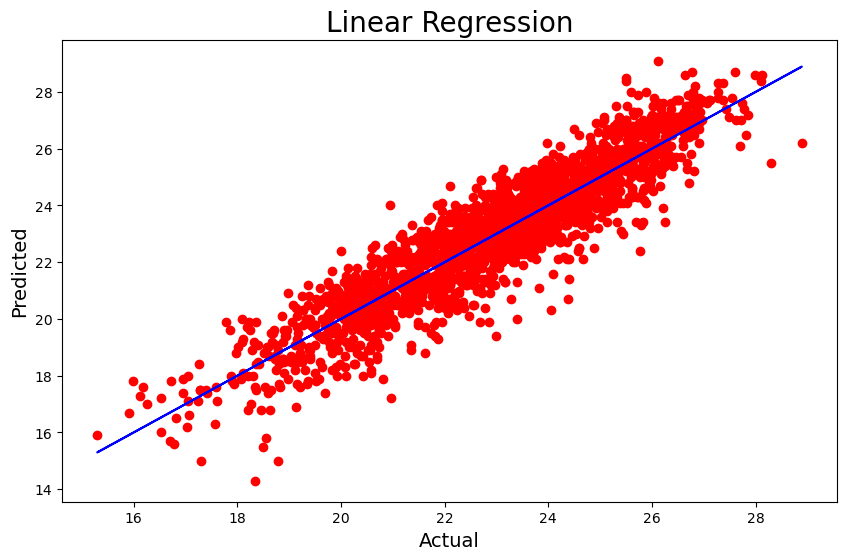

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [57]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.9078788232167077
R2_score on training data: 98.56593294313852
Mean absolute error: 0.5606850402384175
Mean Squared Error: 0.5437638704713156
Root Mean Squared Error: 0.7374034651880309


In [58]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.8854552224441637
R2_score on training data: 91.68495080770943
Mean absolute error: 0.6225604341221781
Mean Squared Error: 0.676123707500596
Root Mean Squared Error: 0.8222674184841547


In [59]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8922833361506537
R2_score on training data: 90.47366049108528
Mean absolute error: 0.6228559599462065
Mean Squared Error: 0.6358193858808938
Root Mean Squared Error: 0.7973828352058338


In [60]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.5883096427260772
R2_score on training data: 57.735328988467046
Mean absolute error: 1.229397721208203
Mean Squared Error: 2.4300855669007055
Root Mean Squared Error: 1.5588731721665832


In [61]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.843907514979138
R2_score on training data: 83.02396890710973
Mean absolute error: 0.7550494849947058
Mean Squared Error: 0.9213674506796329
Root Mean Squared Error: 0.9598788729207622


In [62]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.789568359196444
R2_score on training data: 100.0
Mean absolute error: 0.835345450912253
Mean Squared Error: 1.2421153036521364
Root Mean Squared Error: 0.9598788729207622


In [63]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.9174711283825986
R2_score on training data: 92.90016245867668
Mean absolute error: 0.5388686674859295
Mean Squared Error: 0.48714334991482133
Root Mean Squared Error: 0.6979565530280674


In [64]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.9169320532268879
R2_score on training data: 100.0
Mean absolute error: 0.5311000438680714
Mean Squared Error: 0.49032535000839084
Root Mean Squared Error: 0.7002323542999073


In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.74198773 0.67700444 0.80333501 0.84345834 0.85340637]
0.7838383782409957
Difference betweem r score and Cv is :  6.0068032247248215


In [67]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.72565732 0.69633583 0.81141012 0.85006358 0.83828467]
0.7843503052262705
Difference betweem r score and Cv is :  12.352851799043718


In [68]:
score2=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.4931671  0.51234381 0.68129719 0.69368296 0.7801013 ]
0.6321184699804846
Difference betweem r score and Cv is :  25.333675246367914


In [69]:
score3=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.73574425 0.69780186 0.83145709 0.86114191 0.86921826]
0.7990726730592768
Difference betweem r score and Cv is :  9.321066309137693


In [70]:
score4=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.54781002 0.40643413 0.56890506 0.46451142 0.62923939]
0.5233800020027627
Difference betweem r score and Cv is :  6.4929640723314535


In [71]:
score5=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.74202384 0.67707211 0.80331204 0.84347903 0.85341719]
0.7838608404855193
Difference betweem r score and Cv is :  6.004667449361866


In [72]:
score6=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.44578685 0.42099087 0.62982035 0.74742984 0.66740898]
0.5822873784581446
Difference betweem r score and Cv is :  20.728098073829937


In [73]:
score7=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.68290169 0.6611553  0.78643703 0.81040171 0.84365252]
0.7569096502469209
Difference betweem r score and Cv is :  16.05614781356777


In [74]:
score8=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.73120123 0.68757806 0.81550438 0.85048251 0.86030656]
0.789014547581451
Difference betweem r score and Cv is :  12.79175056454369


Here our best fit model is linear regression as cv score and r2 score difference is least

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4],
    'positive': [True, False]
}

gscv=GridSearchCV(LR,param_grid,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, -1, 1, 2, 4],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [79]:
gscv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [81]:
Model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=True,positive=False)

In [82]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred_rd))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.843907514979138
Mean absolute error: 0.7550453523767714
Mean Squared Error: 0.9213739701604338
Root Mean Squared Error: 0.959882268906158


In [83]:
import joblib

In [84]:
#saving model

import pickle
filename='Temperature Forecast Next_Tmin.pkl'
pickle.dump(Model,open(filename,'wb')) 

In [85]:
import pickle
loaded_model=pickle.load(open('Temperature Forecast Next_Tmin.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.3906410488244


In [86]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])
conclusion

0          1          2          3          4          5     \
Predicted  25.762947  23.896873  23.148307  19.609385  25.806311  25.854867   
Original   25.700000  24.500000  22.500000  19.400000  26.100000  24.200000   

                6          7          8          9     ...       2063  \
Predicted  24.843431  25.372553  20.210578  16.962102  ...  20.572636   
Original   25.800000  25.800000  20.800000  17.400000  ...  18.200000   

               2064     2065       2066       2067       2068       2069  \
Predicted  23.26274  25.7587  23.602496  21.523067  21.518262  26.138079   
Original   22.30000  25.9000  24.200000  21.200000  22.300000  26.200000   

                2070       2071       2072  
Predicted  19.465784  22.358438  18.509552  
Original   19.700000  20.600000  18.800000  

[2 rows x 2073 columns]

Now build regression model pn Next_Tmax

In [87]:
X=df.drop("Next_Tmax",axis=1)
Y=df["Next_Tmax"]

In [88]:
X.shape

(6907, 22)

In [89]:
Y.shape

(6907,)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.430760     -0.821754     0.193211     0.437878         -0.659354   
1         0.688750     -0.735346    -0.240045     0.363875         -0.010082   
2         0.583796     -0.000870    -0.498375    -0.595244          0.077849   
3         0.723735      0.042335     0.192061     1.214202         -0.063461   
4         0.513827     -0.605732     0.042707     0.298847         -0.279337   
...            ...           ...          ...          ...               ...   
6902     -2.389904     -2.377115    -2.233737    -1.421450         -0.754887   
6903     -2.599813     -2.549933    -1.842881    -0.636259         -1.159742   
6904     -2.319935     -2.679546    -2.085350    -1.333441         -1.288685   
6905     -2.319935     -2.420320    -2.280615    -1.561230         -1.048171   
6906     -2.354920     -2.549933    -2.360699    -1.568641         -0.708540   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            -0.284272  0.059277  0.223151  -0.444076  -0.531295  ...   
1             0.177244 -0.627636 -0.303591  -0.477748  -0.331600  ...   
2             0.415448 -0.345606 -1.246873  -0.542243  -0.307833  ...   
3            -0.140960 -0.654820  0.111132  -0.514201  -0.439086  ...   
4            -0.068998 -0.599763  1.381448  -0.773408  -0.339009  ...   
...                ...       ...       ...        ...        ...  ...   
6902         -2.395926 -0.065951 -1.576463  -1.166436  -1.255930  ...   
6903         -2.615434 -0.578473  0.604949  -1.112336  -1.279498  ...   
6904         -2.183740 -0.339019  0.301541  -1.257678  -1.043761  ...   
6905         -2.202666 -0.101536 -0.444823  -1.234378  -1.069091  ...   
6906         -2.297187  0.323561 -1.592223  -1.182191  -1.132049  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.552565    -0.49886    -0.47921   -0.421974  1.212696  0.001303   
1      -0.552565    -0.49886    -0.47921   -0.421974  1.212696  0.516019   
2      -0.552565    -0.49886    -0.47921   -0.421974  0.672910  0.842425   
3      -0.552565    -0.49886    -0.47921   -0.421974  2.020375  0.390479   
4      -0.552565    -0.49886    -0.47921   -0.421974  0.135124  1.809087   
...          ...         ...         ...         ...       ...       ...   
6902   -0.552565    -0.49886    -0.47921   -0.421974  0.135124  0.616452   
6903   -0.552565    -0.49886    -0.47921   -0.421974 -0.674555  1.193938   
6904   -0.552565    -0.49886    -0.47921   -0.421974 -0.134769 -1.254102   
6905   -0.552565    -0.49886    -0.47921   -0.421974 -0.404662 -1.028129   
6906   -0.552565    -0.49886    -0.47921   -0.421974 -0.404662 -0.262332   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.362315  1.292359         1.551286  -0.785463  
1    -0.137558 -0.415548         1.257647  -0.239035  
2    -0.482410 -0.860644         1.243968   0.349426  
3    -0.111644  1.169840         1.228308   0.517558  
4    -0.425683 -0.428212         1.234456  -0.239035  
...        ...       ...              ...        ...  
6902 -0.734620 -0.333629        -2.100384  -2.256615  
6903 -0.913828 -1.234170        -2.134173  -2.508812  
6904 -1.227057 -1.158260        -2.130585  -2.088483  
6905 -1.135875 -0.966149        -2.142323  -1.794253  
6906 -1.022657 -0.848909        -2.111502  -2.382714  

[6907 rows x 22 columns]

In [91]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

VIF Values          Features
0     2.762090      Present_Tmax
1     3.324166      Present_Tmin
2     5.946292       LDAPS_RHmin
3     2.230464       LDAPS_RHmax
4     6.849817  LDAPS_Tmax_lapse
5     8.431471  LDAPS_Tmin_lapse
6     1.208218          LDAPS_WS
7     1.519637          LDAPS_LH
8     4.810657         LDAPS_CC1
9     5.405438         LDAPS_CC2
10    5.142673         LDAPS_CC3
11    3.006012         LDAPS_CC4
12    2.674340        LDAPS_PPT1
13    2.215801        LDAPS_PPT2
14    1.739252        LDAPS_PPT3
15    1.742318        LDAPS_PPT4
16    1.190347               lat
17    1.178434               lon
18    2.936667               DEM
19    2.792253             Slope
20    1.250516   Solar radiation
21    5.353075         Next_Tmin

Here also vif value is less in all columns means there is no multicolinearity issue

In [95]:
# finding the best random state

maxACCU=0
maxRS=0

for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=i
        
print("Maximum r2 score is:", maxACCU,  "on random state:",maxRS)        

Maximum r2 score is: 0.7868643506184198 on random state: 47


In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRS)

In [97]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
pred_LR=LR.predict(X_test)
pred_train=LR.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_LR))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_LR)))

R2_score: 0.7868643506184198
R2_score on training data: 76.68513853992667
Mean absolute error: 1.0600082341026877
Mean Squared Error: 1.8632285055825868
Root Mean Squared Error: 1.3650012840955816


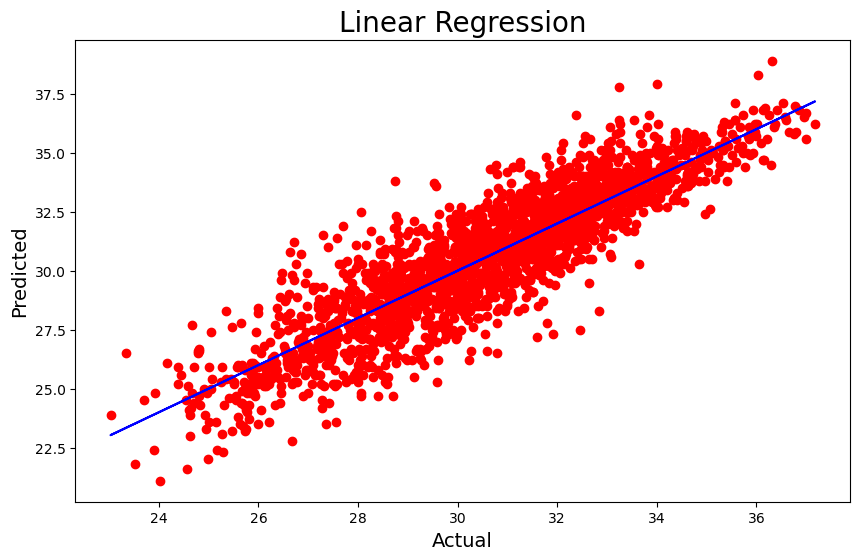

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=Y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [101]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_RFR))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_RFR)))

R2_score: 0.8898851578034045
R2_score on training data: 98.40669148302811
Mean absolute error: 0.7392140693177969
Mean Squared Error: 0.9626222242207232
Root Mean Squared Error: 0.9811331327708402


In [102]:
knn=KNN()
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_knn))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_knn)))

R2_score: 0.8620942488150238
R2_score on training data: 91.31870370681372
Mean absolute error: 0.8158221735146131
Mean Squared Error: 1.2055699149212036
Root Mean Squared Error: 1.0979844784518602


In [103]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_GBR))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_GBR)))

R2_score: 0.8469100665671725
R2_score on training data: 86.53981405216769
Mean absolute error: 0.8961356983556812
Mean Squared Error: 1.3383097980906622
Root Mean Squared Error: 1.156853403889474


In [104]:
lasso=Lasso()
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_lasso))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2_score: 0.5277526092929656
R2_score on training data: 53.290317483894924
Mean absolute error: 1.621308544223786
Mean Squared Error: 4.128379286174859
Root Mean Squared Error: 2.0318413535940394


In [105]:
rd=Ridge()
rd.fit(X_train,Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_rd))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_rd)))

R2_score: 0.7868753546729574
R2_score on training data: 76.6851198568124
Mean absolute error: 1.059980569469723
Mean Squared Error: 1.8631323083103273
Root Mean Squared Error: 1.364966046577836


In [106]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_dtr))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_rd)))

R2_score: 0.7566851476015394
R2_score on training data: 100.0
Mean absolute error: 1.0514710790764914
Mean Squared Error: 2.1270546252391096
Root Mean Squared Error: 1.364966046577836


In [107]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,Y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_svr))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_svr)))

R2_score: 0.8799581169724289
R2_score on training data: 89.33770748559301
Mean absolute error: 0.7632298039235124
Mean Squared Error: 1.049404259539656
Root Mean Squared Error: 1.0244043437723485


In [108]:
etr=ExtraTreesRegressor()
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)
print('R2_score:',r2_score(Y_test,pred_etr))
print('R2_score on training data:', r2_score(Y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(Y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(Y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_etr)))

R2_score: 0.9091241779251871
R2_score on training data: 100.0
Mean absolute error: 0.6719028857697288
Mean Squared Error: 0.7944350119247392
Root Mean Squared Error: 0.8913108391154789


   Checking cross validation

In [109]:
scoremax=cross_val_score(LR,X,Y,cv=5,scoring='r2')
print(scoremax)
print(scoremax.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_LR)-scoremax.mean())*100)

[0.73141356 0.67543658 0.68049578 0.74635554 0.68048061]
0.7028364145750855
Difference betweem r score and Cv is :  8.402793604333425


In [110]:
scoremax1=cross_val_score(RFR,X,Y,cv=5,scoring='r2')
print(scoremax1)
print(scoremax1.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_RFR)-scoremax1.mean())*100)

[0.70057333 0.66530922 0.66692038 0.72961794 0.6455977 ]
0.6816037139203641
Difference betweem r score and Cv is :  20.828144388304036


In [111]:
scoremax2=cross_val_score(knn,X,Y,cv=5,scoring='r2')
print(scoremax2)
print(scoremax2.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_knn)-scoremax2.mean())*100)

[0.62345144 0.47539615 0.5028441  0.63109307 0.5965296 ]
0.5658628735998248
Difference betweem r score and Cv is :  29.623137521519904


In [112]:
scoremax3=cross_val_score(GBR,X,Y,cv=5,scoring='r2')
print(scoremax3)
print(scoremax3.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_GBR)-scoremax3.mean())*100)

[0.69543443 0.6652739  0.67629814 0.77320396 0.65694987]
0.6934320599526836
Difference betweem r score and Cv is :  15.347800661448884


In [113]:
scoremax4=cross_val_score(lasso,X,Y,cv=5,scoring='r2')
print(scoremax4)
print(scoremax4.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_lasso)-scoremax4.mean())*100)

[0.46568419 0.46470373 0.55665833 0.37408339 0.52244343]
0.47671461312158925
Difference betweem r score and Cv is :  5.103799617137639


In [114]:
scoremax5=cross_val_score(rd,X,Y,cv=5,scoring='r2')
print(scoremax5)
print(scoremax5.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_rd)-scoremax5.mean())*100)

[0.73155436 0.67543656 0.68045091 0.74639373 0.68050911]
0.7028689349958357
Difference betweem r score and Cv is :  8.400641967712176


In [115]:
scoremax6=cross_val_score(dtr,X,Y,cv=5,scoring='r2')
print(scoremax6)
print(scoremax6.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_dtr)-scoremax6.mean())*100)

[0.29434498 0.36719986 0.4151147  0.52079479 0.45533643]
0.410558153238633
Difference betweem r score and Cv is :  34.61269943629064


In [116]:
scoremax7=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(scoremax7)
print(scoremax7.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_svr)-scoremax7.mean())*100)

[0.68453032 0.59568388 0.67947472 0.76418772 0.68300674]
0.6813766747346175
Difference betweem r score and Cv is :  19.85814422378114


In [117]:
scoremax8=cross_val_score(etr,X,Y,cv=5,scoring='r2')
print(scoremax8)
print(scoremax8.mean())
print('Difference betweem r score and Cv is : ',(r2_score(Y_test,pred_etr)-scoremax8.mean())*100)

[0.70854469 0.64601896 0.68779887 0.74449357 0.66019765]
0.6894107469863862
Difference betweem r score and Cv is :  21.97134309388009


Here also our best fit model is liner regression as cv score and r2 score difference is least

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4],
    'positive': [True, False]
}

gscv=GridSearchCV(LR,param_grid,cv=5)
gscv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, -1, 1, 2, 4],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [119]:
gscv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [120]:
model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,positive=False)

In [121]:
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print('R2_score:',r2_score(Y_test,pred_rd))
print('Mean absolute error:',mean_absolute_error(Y_test,pred))
print('Mean Squared Error:',mean_squared_error(Y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred)))

R2_score: 0.7868753546729574
Mean absolute error: 1.0600082341026877
Mean Squared Error: 1.8632285055825868
Root Mean Squared Error: 1.3650012840955816


In [127]:
import joblib

In [131]:
#saving model

import pickle
filename='Temperature Forecast Next_Tmax.pkl'
pickle.dump(model,open(filename,'wb')) 

In [132]:
import pickle
loaded_modelTmax=pickle.load(open('Temperature Forecast Next_Tmax.pkl','rb'))
result=loaded_modelTmax.score(X_test,Y_test)
print(result*100)

78.68643506184198


In [133]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],Y_test[:]], index=['Predicted','Original'])
conclusion

0          1          2          3          4          5     \
Predicted  21.65129  26.096182  24.096894  22.912477  21.827278  18.488839   
Original   34.10000  31.600000  31.900000  33.200000  25.200000  32.100000   

                6         7          8          9     ...       2063  \
Predicted  22.567386  22.88129  24.264545  23.244171  ...  23.307807   
Original   28.800000  32.80000  32.000000  34.600000  ...  31.100000   

                2064       2065       2066       2067       2068       2069  \
Predicted  25.178571  23.082353  21.927084  22.190921  18.413383  21.493892   
Original   33.300000  30.100000  30.500000  27.600000  29.000000  25.800000   

                2070       2071       2072  
Predicted  19.360064  24.040912  21.762678  
Original   30.400000  30.200000  30.100000  

[2 rows x 2073 columns]